## 1. Import library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import os
from sklearn.impute import KNNImputer


## 2. Data

**Nguồn Dữ Liệu - Cafeland.vn**

**1. Nguồn Gốc Dữ Liệu**

- **Trang web nguồn**: Cafeland.vn là một nền tảng chuyên cung cấp thông tin về bất động sản tại Việt Nam. Trang web này cung cấp các dịch vụ liên quan đến mua bán, cho thuê bất động sản và các tin tức về thị trường bất động sản.

- **Nội dung dữ liệu**: Dữ liệu được thu thập từ các bài đăng, tin rao vặt hoặc các listing bất động sản trên Cafeland.vn. Các tin rao này cung cấp thông tin về các bất động sản đang được chào bán, bao gồm giá bán, diện tích, vị trí, loại hình bất động sản, số phòng, pháp lý, và các thông tin khác liên quan.

**2. Các Đặc Trưng Trong Dữ Liệu**

Thông tin về các bất động sản có thể bao gồm các đặc trưng sau:

- **Diện tích**: Diện tích của căn nhà, căn hộ, hoặc mảnh đất, thường được đo bằng m². Đây là đặc trưng quan trọng trong việc định giá bất động sản.

- **Số phòng ngủ**: Số lượng phòng ngủ trong căn nhà hoặc căn hộ. Đây là yếu tố ảnh hưởng đến khả năng sử dụng của căn hộ cho các gia đình có nhu cầu về không gian sống.

- **Số tầng**: Số tầng của bất động sản. Điều này có thể liên quan đến giá trị của bất động sản, đặc biệt là đối với các tòa nhà cao tầng hoặc biệt thự.

- **Số toilet**: Số lượng nhà vệ sinh trong căn hộ hoặc nhà ở. Thường là một yếu tố ảnh hưởng đến sự tiện nghi của bất động sản.

- **Số phòng khách**: Số lượng phòng khách. Cũng là yếu tố quan trọng trong việc đánh giá tính năng sử dụng của bất động sản.

- **Loại địa ốc**: Đây là loại hình bất động sản như Bán nhà riêng, Bán căn hộ chung cư, Bán đất nền, v.v.

- **Địa chỉ**: Vị trí của bất động sản, thường bao gồm thông tin về quận, huyện và thành phố. Địa chỉ này quan trọng trong việc xác định giá trị bất động sản, vì vị trí có ảnh hưởng lớn đến giá cả.

- **Pháp lý**: Tình trạng pháp lý của bất động sản, như Sổ hồng (sở hữu hợp pháp) hay các tình trạng khác (ví dụ: Sổ đỏ, chưa có sổ). Điều này ảnh hưởng lớn đến khả năng chuyển nhượng và giá trị của bất động sản.

- **Hướng nhà**: Hướng mà căn nhà hoặc căn hộ đối diện, thường là một yếu tố được nhiều người quan tâm khi mua nhà.

- **Đường trước nhà**: Thông tin về con đường hoặc lối đi trước nhà, chẳng hạn như 3m, 5m, ngõ rộng, v.v. Đây cũng có thể ảnh hưởng đến tính tiện ích và giá trị của bất động sản.

- **Giá nhà**: Giá chào bán của bất động sản. Đây là thông tin quan trọng nhất trong việc định giá và đánh giá thị trường bất động sản. Giá này có thể được chia thành Giá nhà (tỷ) trong trường hợp bạn đang xử lý giá trị theo đơn vị tỷ đồng.

**3. Tính Năng và Ứng Dụng**

Dữ liệu này chủ yếu được sử dụng để phân tích và dự đoán giá trị của bất động sản trong các mô hình phân tích thị trường. Các phân tích có thể bao gồm:

- **Dự đoán giá bất động sản**: Dựa vào các đặc trưng như diện tích, số phòng, vị trí, pháp lý, v.v., bạn có thể xây dựng mô hình để dự đoán giá nhà cho các căn nhà hoặc căn hộ chưa có giá.

- **Phân tích thị trường bất động sản**: Đánh giá xu hướng giá trị bất động sản theo thời gian, phân tích sự biến động của giá cả tại các khu vực khác nhau và tìm ra các yếu tố ảnh hưởng đến giá trị bất động sản.

- **Phân khúc thị trường**: Nhóm các bất động sản theo các đặc trưng như loại nhà, diện tích, hay khu vực để phân tích sự khác biệt về giá giữa các phân khúc thị trường.

**4. Chất Lượng và Độ Tin Cậy của Dữ Liệu**

Dữ liệu từ các trang web như Cafeland.vn có thể không hoàn hảo và cần được xử lý thêm để loại bỏ những dữ liệu thiếu hoặc không chính xác. Một số vấn đề có thể gặp phải:

- **Dữ liệu thiếu**: Nhiều cột trong dữ liệu có thể bị thiếu, chẳng hạn như Số tầng, Số phòng ngủ, Đường trước nhà, và có thể cần phải sử dụng các phương pháp xử lý dữ liệu thiếu như imputation hoặc xử lý giá trị mặc định.

- **Dữ liệu không chính xác**: Dữ liệu có thể bị sai lệch do thông tin không được cập nhật kịp thời, giá trị có thể không phản ánh đúng giá trị thực tế của bất động sản.

- **Dữ liệu không đồng nhất**: Một số thông tin có thể không nhất quán, ví dụ, cách ghi nhận giá có thể khác nhau (chỉ ghi "tỷ" hay "triệu", hoặc có thêm các ký tự như "/m2").

## 3. Load data

In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv("property_data_v8.csv")

In [ ]:
df.sample(10)

,Diện tích,Phòng ngủ,Số tầng,Số toilet,Số phòng khách,Loại địa ốc,Địa chỉ,Pháp lý,Hướng nhà,Đường trước nhà,Giá nhà,Giá nhà (tỷ)
26088,75.0,3.0,4.0,4.0,1.0,Bán nhà phố dự án,"Cái Răng, TP. Cần Thơ",Sổ hồng,Đông Nam,17.5,2 tỷ 600 triệu,2.60
18954,64.0,3.0,12.0,2.0,1.0,Bán nhà phố dự án,"Đà Lạt, Lâm Đồng",Sổ hồng,Đông Nam,21.3,4 tỷ 500 triệu,4.50
6611,154.0,4.0,3.0,4.0,1.0,Bán nhà riêng,"Huế, Thừa Thiên Huế",Giấy tờ hợp lệ,NaN,17.5,9 tỷ,9.00
6165,92.0,3.0,3.0,2.0,1.0,Bán nhà phố dự án,"TP. Yên Bái, Yên Bái",Sổ hồng,Đông Nam,NaN,1 tỷ 500 triệu,1.50
49452,60.0,2.0,13.0,2.0,1.0,Bán căn hộ chung cư,"Thuận An, Bình Dương",Sổ hồng,Đông Nam,12.5,1 tỷ 400 triệu,1.40
59615,120.0,9.0,NaN,3.0,1.0,Bán nhà phố dự án,"Thạnh Phú, Bến Tre",Sổ hồng,Đông Nam,12.5,Thương lượng,NaN
32988,1000.0,14.0,4.0,9.0,1.0,Bán nhà riêng,"Quận Tân Phú, TP. Hồ Chí Minh",Sổ hồng,Đông Nam,19.6,68 tỷ,68.00
49298,98.0,4.0,3.0,3.0,1.0,Bán nhà riêng,"Dĩ An, Bình Dương",Sổ hồng,Đông Nam,22.8,2 tỷ 800 triệu,2.80
13462,85.0,3.0,7.0,2.0,1.0,Bán căn hộ chung cư,"Đông Anh, Hà Nội",Sổ hồng,Đông Nam,12.9,2 tỷ 530 triệu,2.53
59908,100.0,4.0,3.0,5.0,1.0,Bán biệt thự,"TP. Bến Tre, Bến Tre",Sổ hồng,Đông Bắc,10.0,690 triệu,0.69


# DATA PREPROCESSING

## 1. Area processing

Chuẩn hóa cột Diện tích để chuyển dữ liệu từ dạng văn bản như "50m2" thành **kiểu số thực (float)**

In [ ]:
df['Diện tích'] = (
    df['Diện tích']
    .astype(str)
    .str.replace('m2', '', regex=False)
    .str.strip()
)

df['Diện tích'] = pd.to_numeric(df['Diện tích'], errors='coerce')
df['Diện tích'].head()

,Diện tích
0,99.0
1,99.0
2,100.0
3,100.0
4,85.0


## 2. Road in front of the house processing


In [ ]:
df['Đường trước nhà'] = df['Đường trước nhà'].astype(str) \
                        .str.replace('m', '', regex=False)

def extract_average_width(value):
    try:
        value = value.strip()
        if '-' in value:
            parts = value.split('-')
            nums = [float(p.strip()) for p in parts]
            return sum(nums) / len(nums)
        return float(value)
    except:
        return None

df['Đường trước nhà'] = df['Đường trước nhà'].apply(extract_average_width)
df['Đường trước nhà']

,Đường trước nhà
0,16.5
1,22.5
2,39.0
3,17.4
4,10.1
...,...
61828,12.5
61829,12.5
61830,12.5
61831,NaN


## 3. Address processing

Rút gọn địa chỉ: Giữ lại 2 phần cuối cùng trong địa chỉ gốc — thông thường là **Quận** và **Thành phố**.


In [ ]:
df['Địa chỉ'] = df['Địa chỉ'].str.split(',').apply(lambda x: ', '.join(x[-2:]))
df['Địa chỉ'].head()

,Địa chỉ
0,"TP. Bạc Liêu, Bạc Liêu"
1,"TP. Bạc Liêu, Bạc Liêu"
2,"Đông Hải, Bạc Liêu"
3,"Đông Hải, Bạc Liêu"
4,"Đông Hải, Bạc Liêu"


## 4. Price processing

Phần này được xây dựng nhằm chuẩn hóa cột **Giá nhà** về định dạng số thực (float), đơn vị là tỷ đồng, từ các chuỗi định dạng không đồng nhất ban đầu. Mục tiêu là giúp việc phân tích, trực quan hóa và huấn luyện mô hình được thực hiện dễ dàng và chính xác hơn.

**1. Xử lý giá trị bị thiếu hoặc không xác định**: Bỏ qua các giá trị như "Thương lượng", "Liên hệ", "Thoả thuận"...

**2. Xử lý đơn giá dạng triệu/m²**: Dùng diện tích để tính tổng giá trị bất động sản nếu chỉ có đơn giá theo m².

**3. Chuyển đổi các định dạng giá nhà phổ biến thành tỷ đồng**

- "x tỷ y triệu": VD 3 tỷ 500 triệu = 3.5 tỷ
- "x.y tỷ": VD 4.2 tỷ
- "z triệu": 800 triệu

**4. Trả về None nếu định dạng không xử lý được**: Đảm bảo dữ liệu "Giá nhà (tỷ)" chỉ chứa giá trị hợp lệ.

In [ ]:
def convert_price(price, area=None):
    if pd.isna(price):
        return None

    price = price.lower().replace(',', '').strip()
    # Bỏ qua các trường hợp không có giá cụ thể
    if any(kw in price for kw in ['Thương lượng', 'Liên hệ', 'Thoả thuận', 'Call']):
        return None

    # Đơn giá dạng "xx triệu /m2"
    match_don_gia = re.match(r'(\d+(\.\d+)?)\s*triệu\s*/m2', price)
    if match_don_gia and area:
        don_gia_trieu = float(match_don_gia.group(1))
        return (don_gia_trieu * area) / 1000

    # Trường hợp "x tỷ y triệu"
    match = re.match(r"(\d+)\s*tỷ\s*(\d+)\s*triệu", price)
    if match:
        ty = float(match.group(1))
        trieu = float(match.group(2)) / 1000
        return ty + trieu

    # Trường hợp "x.y tỷ"
    match_ty = re.match(r'(\d+(\.\d+)?)\s*tỷ', price)
    if match_ty:
        return float(match_ty.group(1))

    # Trường hợp chỉ có triệu
    if "triệu" in price:
        try:
            return float(price.replace("triệu", "").strip()) / 1000
        except:
            return None

    return None

df['Giá nhà (tỷ)'] = df.apply(lambda row: convert_price(row['Giá nhà'], row['Diện tích']), axis=1)
df['Giá nhà (tỷ)'].head()

,Giá nhà (tỷ)
0,4.65
1,5.00
2,1.15
3,1.10
4,NaN


In [ ]:
df.sample(10)

,Diện tích,Phòng ngủ,Số tầng,Số toilet,Số phòng khách,Loại địa ốc,Địa chỉ,Pháp lý,Hướng nhà,Đường trước nhà,Giá nhà,Giá nhà (tỷ)
15641,82.0,3.0,14.0,2.0,4.0,Bán căn hộ chung cư,"Đông Anh, Hà Nội",Sổ hồng,Đông Nam,18.0,2 tỷ 500 triệu,2.500
35376,330.0,4.0,3.0,5.0,NaN,Bán nhà phố dự án,"Quận 12, TP. Hồ Chí Minh",Sổ hồng,Đông Nam,9.9,4 tỷ 800 triệu,4.800
51282,120.0,2.0,1.0,2.0,1.0,Bán nhà phố dự án,"Thuận An, Bình Dương",Giấy tờ hợp lệ,Tây Nam,5.0,1 tỷ 370 triệu,1.370
1792,307.0,3.0,3.0,3.0,1.0,Bán biệt thự,"Hạ Long, Quảng Ninh",Hợp đồng,Đông Bắc,7.0,36 tỷ 600 triệu,36.600
28929,50.0,2.0,4.0,2.0,1.0,Bán biệt thự,"Phan Rang - Tháp Chàm, Ninh Thuận",Sổ hồng,Đông Nam,12.5,4 tỷ 300 triệu,4.300
52005,50.0,2.0,12.0,3.0,2.0,Bán căn hộ chung cư,"Thuận An, Bình Dương",Sổ hồng,Đông Nam,12.0,19 tỷ,19.000
6746,80.0,3.0,NaN,3.0,1.0,Bán biệt thự,"Hương Thủy, Thừa Thiên Huế",Sổ hồng,Nam,12.5,4 tỷ 481 triệu,4.481
27742,228.0,2.0,2.0,3.0,2.0,Bán nhà phố dự án,"TP. Sóc Trăng, Sóc Trăng",Sổ hồng,Đông Nam,17.5,3 tỷ 800 triệu,3.800
8046,112.0,3.0,3.0,3.0,1.0,Bán biệt thự,"Phú Vang, Thừa Thiên Huế",Hợp đồng,Đông,12.5,3 tỷ 500 triệu,3.500
51404,53.0,2.0,1.0,2.0,1.0,NaN,"Dĩ An, Bình Dương",Sổ hồng,Tây,10.0,1 tỷ 400 triệu,1.400


# MISSING VALUE

In [ ]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61833 entries, 0 to 61832
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diện tích        60006 non-null  float64
 1   Phòng ngủ        60040 non-null  float64
 2   Số tầng          59916 non-null  float64
 3   Số toilet        59982 non-null  float64
 4   Số phòng khách   60002 non-null  float64
 5   Loại địa ốc      60025 non-null  object 
 6   Địa chỉ          61833 non-null  object 
 7   Pháp lý          60018 non-null  object 
 8   Hướng nhà        60018 non-null  object 
 9   Đường trước nhà  59965 non-null  float64
 10  Giá nhà          61833 non-null  object 
 11  Giá nhà (tỷ)     54634 non-null  float64
dtypes: float64(7), object(5)
memory usage: 5.7+ MB
None
Diện tích          1827
Phòng ngủ          1793
Số tầng            1917
Số toilet          1851
Số phòng khách     1831
Loại địa ốc        1808
Địa chỉ               0
Pháp lý            181

In [ ]:
# Tạo một bản sao để xử lý dữ liệu bị thiếu
df_copy = df

## 1. Fill in the values missing

In [ ]:
# Các cột cần xử lý
numeric_cols = ['Diện tích', 'Phòng ngủ', 'Số tầng', 'Số toilet', 'Số phòng khách', 'Đường trước nhà', 'Giá nhà (tỷ)']

# Tạo bản sao dữ liệu để xử lý
df_numeric = df_copy[numeric_cols]

# KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=numeric_cols)

# Làm tròn các cột cần là số nguyên
int_cols = ['Phòng ngủ', 'Số tầng', 'Số toilet', 'Số phòng khách']
df_imputed[int_cols] = df_imputed[int_cols].round().astype('Int64')

# Gán lại vào dataframe chính
df_copy[numeric_cols] = df_imputed
df_copy

,Diện tích,Phòng ngủ,Số tầng,Số toilet,Số phòng khách,Loại địa ốc,Địa chỉ,Pháp lý,Hướng nhà,Đường trước nhà,Giá nhà,Giá nhà (tỷ)
0,99.0,10,4,11,3,Bán nhà phố dự án,"TP. Bạc Liêu, Bạc Liêu",Sổ hồng,Đông Nam,16.50,4 tỷ 650 triệu,4.65
1,99.0,10,4,12,1,Bán nhà phố dự án,"TP. Bạc Liêu, Bạc Liêu",Sổ hồng,Đông Nam,22.50,5 tỷ,5.00
2,100.0,3,3,3,2,Bán căn hộ chung cư,"Đông Hải, Bạc Liêu",Sổ hồng,Đông Nam,39.00,1 tỷ 150 triệu,1.15
3,100.0,3,4,5,3,Bán căn hộ chung cư,"Đông Hải, Bạc Liêu",Sổ hồng,Đông Nam,17.40,1 tỷ 100 triệu,1.10
4,85.0,3,4,3,2,Bán căn hộ chung cư,"Đông Hải, Bạc Liêu",Sổ hồng,Đông Nam,10.10,Thương lượng,2.22
...,...,...,...,...,...,...,...,...,...,...,...,...
61828,100.0,10,4,11,1,Bán nhà phố dự án,"Điện Bàn, Quảng Nam",Giấy đỏ,Tây,12.50,1 tỷ 900 triệu,1.90
61829,100.0,3,4,2,1,Bán nhà phố dự án,"Điện Bàn, Quảng Nam",Hợp đồng,Đông Nam,12.50,1 tỷ 250 triệu,1.25
61830,100.0,3,10,3,2,Bán nhà phố dự án,"Điện Bàn, Quảng Nam",Hợp đồng,Đông Nam,12.50,1 tỷ 300 triệu,1.30
61831,100.0,6,6,10,2,Bán nhà phố dự án,"Điện Bàn, Quảng Nam",Hợp đồng,Đông Nam,27.08,700 triệu,0.70


In [ ]:
df_copy.isna().sum()

,0
Diện tích,0
Phòng ngủ,0
Số tầng,0
Số toilet,0
Số phòng khách,0
Loại địa ốc,1808
Địa chỉ,0
Pháp lý,1815
Hướng nhà,1815
Đường trước nhà,0


In [ ]:
# Điền bằng giá trị xuất hiện nhều nhất
df_copy['Pháp lý'].value_counts()
df_copy['Pháp lý'].fillna(df_copy['Pháp lý'].mode()[0], inplace=True)

# Điền bằng giá trị xuất hiện nhều nhất
df_copy['Hướng nhà'].value_counts()
df_copy['Hướng nhà'].fillna(df_copy['Hướng nhà'].mode()[0], inplace=True)

# Điền bằng giá trị xuất hiện nhều nhất
df_copy['Loại địa ốc'].value_counts()
df_copy['Loại địa ốc'].fillna(df_copy['Loại địa ốc'].mode()[0], inplace=True)

# Điền bằng giá trị median
df_copy['Đường trước nhà'] = df['Đường trước nhà'].astype(float)
df_copy['Đường trước nhà'].fillna(df['Đường trước nhà'].median(), inplace=True)

<ipython-input-13-71c7a0d93f0c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Pháp lý'].fillna(df_copy['Pháp lý'].mode()[0], inplace=True)
<ipython-input-13-71c7a0d93f0c>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [ ]:
df_copy.isna().sum()
df_copy.sample(10)

,Diện tích,Phòng ngủ,Số tầng,Số toilet,Số phòng khách,Loại địa ốc,Địa chỉ,Pháp lý,Hướng nhà,Đường trước nhà,Giá nhà,Giá nhà (tỷ)
5639,32.0,1,18,1,1,Bán căn hộ chung cư,"Phan Thiết, Bình Thuận",Sổ hồng,Đông Nam,17.7,1 tỷ 300 triệu,1.3000
44448,360.0,4,2,3,2,Bán biệt thự,"Nghi Xuân, Hà Tĩnh",Sổ hồng,Đông Nam,10.0,1 tỷ 383 triệu,1.3830
54777,100.0,4,3,4,1,Bán nhà phố dự án,"Châu Đốc, An Giang",Giấy đỏ,Đông Nam,17.5,3 tỷ 600 triệu,3.6000
54521,132.0,2,2,1,1,Bán nhà phố dự án,"Buôn Ma Thuột, Đắk Lắk",Sổ hồng,Đông Nam,4.0,1 tỷ 250 triệu,1.2500
58102,64.0,2,16,2,1,Bán căn hộ chung cư,"Liên Chiểu, TP. Đà Nẵng",Sổ hồng,Đông Nam,30.0,45 triệu /m2,2.8800
49560,42.0,1,11,1,1,Bán căn hộ chung cư,"Thuận An, Bình Dương",Hợp đồng,Đông Nam,17.5,990 triệu,0.9900
16393,135.0,4,4,4,2,Bán biệt thự,"Gia Lâm, Hà Nội",Sổ hồng,Tây Nam,12.5,30 tỷ 800 triệu,30.8000
21638,76.0,3,15,2,1,Bán căn hộ chung cư,"Hồng Bàng, TP. Hải Phòng",Sổ hồng,Đông Nam,9.0,Thương lượng,1.3680
44209,48.0,2,4,2,1,Bán biệt thự,"Văn Giang, Hưng Yên",Sổ hồng,Đông Nam,8.5,Thương lượng,1.9928
9372,40.0,1,13,1,1,Bán căn hộ chung cư,"Quy Nhơn, Bình Định",Sổ hồng,Đông Nam,23.1,300 triệu,0.3000


In [ ]:
# Danh sách các loại địa ốc cần loại bỏ
type_reals_estate = ['Bán đất thổ cư', 'Bán đất nền dự án', 'Bán đất nông, lâm nghiệp', 'Bán kho, nhà xưởng']

# Loại bỏ các dòng có giá trị trong cột 'Loại địa ốc' thuộc danh sách 'type_reals_estate'
df_copy = df_copy[~df_copy['Loại địa ốc'].isin(type_reals_estate)]

# Kiểm tra kết quả
print(df_copy['Loại địa ốc'].value_counts())


Loại địa ốc
Bán nhà phố dự án           20837
Bán nhà riêng               16417
Bán căn hộ chung cư         14883
Bán biệt thự                 9006
Bán nhà hàng - Khách sạn      639
Bán căn hộ Mini, Dịch vụ       51
Name: count, dtype: int64


In [ ]:
df_copy.info()
df_copy.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61833 entries, 0 to 61832
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diện tích        61833 non-null  float64
 1   Phòng ngủ        61833 non-null  Int64  
 2   Số tầng          61833 non-null  Int64  
 3   Số toilet        61833 non-null  Int64  
 4   Số phòng khách   61833 non-null  Int64  
 5   Loại địa ốc      61833 non-null  object 
 6   Địa chỉ          61833 non-null  object 
 7   Pháp lý          61833 non-null  object 
 8   Hướng nhà        61833 non-null  object 
 9   Đường trước nhà  61833 non-null  float64
 10  Giá nhà          61833 non-null  object 
 11  Giá nhà (tỷ)     61833 non-null  float64
dtypes: Int64(4), float64(3), object(5)
memory usage: 5.9+ MB


,Diện tích,Phòng ngủ,Số tầng,Số toilet,Số phòng khách,Loại địa ốc,Địa chỉ,Pháp lý,Hướng nhà,Đường trước nhà,Giá nhà,Giá nhà (tỷ)
44888,60.0,2,29,2,1,Bán biệt thự,"Vĩnh Yên, Vĩnh Phúc",Giấy đỏ,Đông Nam,34.00,1 tỷ 50 triệu,1.05
9876,81.0,4,4,4,1,Bán biệt thự,"Quy Nhơn, Bình Định",Sổ hồng,Đông Nam,12.50,5 tỷ 800 triệu,5.80
60081,310.0,4,3,3,2,Bán nhà riêng,"Kon Plông, Kon Tum",Sổ hồng,Đông Nam,11.70,2 tỷ 800 triệu,2.80
49227,65.0,3,11,2,1,Bán căn hộ chung cư,"Dĩ An, Bình Dương",Sổ hồng,Đông Nam,25.00,3 tỷ 500 triệu,3.50
7913,81.0,3,3,4,1,Bán biệt thự,"Huế, Thừa Thiên Huế",Sổ hồng,Tây Nam,12.50,1 tỷ 800 triệu,1.80
30128,227.5,4,3,3,1,Bán nhà phố dự án,"Bình Thạnh, TP. Hồ Chí Minh",Sổ hồng,Đông Nam,14.10,108 tỷ,108.00
19627,150.0,3,5,2,1,Bán nhà riêng,"Bảo Lâm, Lâm Đồng",Sổ hồng,Đông Nam,21.14,2 tỷ 620 triệu,2.62
46990,450.0,4,4,5,2,Bán nhà phố dự án,"Long Thành, Đồng Nai",Sổ hồng,Tây,40.00,22 tỷ,22.00
60561,345.0,5,3,6,1,Bán nhà phố dự án,"Điện Bàn, Quảng Nam",Sổ hồng,Đông Nam,25.00,11 tỷ,11.00
8609,80.0,3,17,2,1,Bán biệt thự,"Quy Nhơn, Bình Định",Giấy đỏ,Đông Nam,85.00,3 tỷ 200 triệu,3.20


# EDA

## 1. Distribution of dependent variables

- **Diện tích**: Bạn sẽ thấy phân bố diện tích các bất động sản trong dataset. Biểu đồ này có thể cho thấy có bao nhiêu bất động sản có diện tích lớn hoặc nhỏ, và diện tích của chúng có xu hướng tập trung ở một mức độ nào đó không.

- **Phòng ngủ, Số tầng, Số toilet, Số phòng khách**: Các biểu đồ phân phối sẽ giúp bạn hiểu được số lượng phòng ngủ, số tầng, số toilet, và số phòng khách phổ biến trong các bất động sản. Bạn có thể thấy liệu phần lớn các bất động sản là nhà nhỏ hay nhà lớn, có bao nhiêu bất động sản có nhiều toilet, v.v.

- **Giá nhà (tỷ)**: Biểu đồ phân phối giá sẽ giúp bạn khám phá sự phân bố của giá bất động sản. Nó cho thấy liệu phần lớn bất động sản có giá thấp hay cao và liệu có bất động sản có giá rất cao hoặc thấp (outliers).

### **Phân tích giá nhà trung bình theo diện tích tài sản**

<ipython-input-17-ca58f738b002>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Khoảng diện tích', y='Giá nhà trung bình', data=average_price_df, palette="GnBu", errorbar=None)


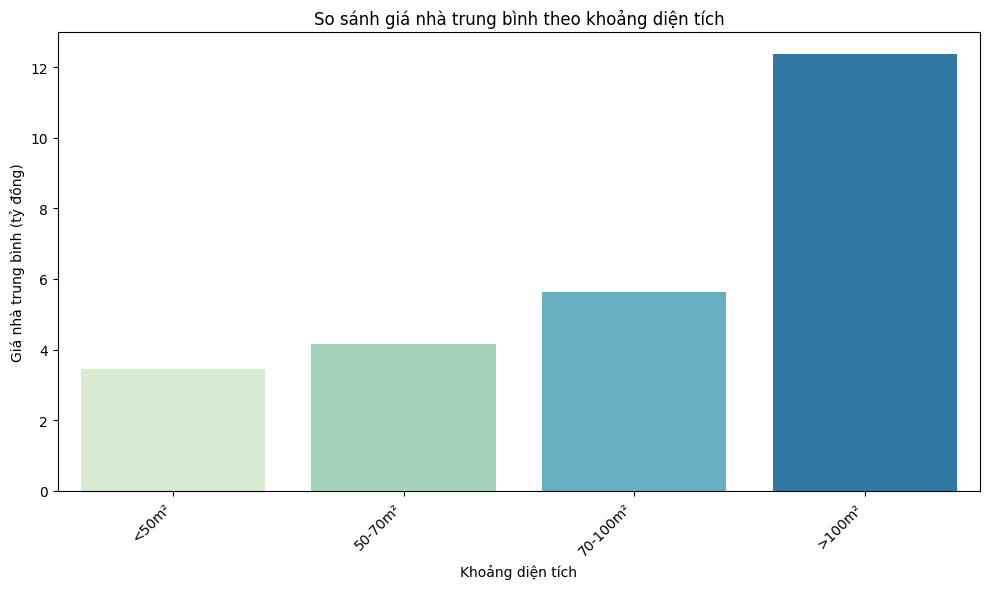

In [ ]:
# Xác định các khoảng diện tích
bins = [0, 50, 70, 100, df_copy['Diện tích'].max()]
labels = ['<50m²', '50-70m²', '70-100m²', '>100m²']

# Tạo một DataFrame tạm thời chứa giá nhà trung bình theo khoảng diện tích
grouped_data = []
for i in range(len(bins) - 1):
    lower_bound = bins[i]
    upper_bound = bins[i+1]
    if i == len(bins) - 2:
        subset = df_copy[(df_copy['Diện tích'] >= lower_bound)]
    else:
        subset = df_copy[(df_copy['Diện tích'] >= lower_bound) & (df_copy['Diện tích'] < upper_bound)]

    if not subset.empty:
        average_price = subset['Giá nhà (tỷ)'].mean()
        grouped_data.append({'Khoảng diện tích': labels[i], 'Giá nhà trung bình': average_price})

average_price_df = pd.DataFrame(grouped_data)

# Sắp xếp theo thứ tự khoảng diện tích
category_order = ['<50m²', '50-70m²', '70-100m²', '>100m²']
average_price_df['Khoảng diện tích'] = pd.Categorical(average_price_df['Khoảng diện tích'], categories=category_order, ordered=True)
average_price_df = average_price_df.sort_values('Khoảng diện tích')

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x='Khoảng diện tích', y='Giá nhà trung bình', data=average_price_df, palette="GnBu", errorbar=None)
plt.title('So sánh giá nhà trung bình theo khoảng diện tích')
plt.xlabel('Khoảng diện tích')
plt.ylabel('Giá nhà trung bình (tỷ đồng)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Phân tích giá nhà trung bình với vị trí địa lý**

<ipython-input-18-cd3c01161574>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price_by_city.values, y=average_price_by_city.index, palette="GnBu", errorbar=None)


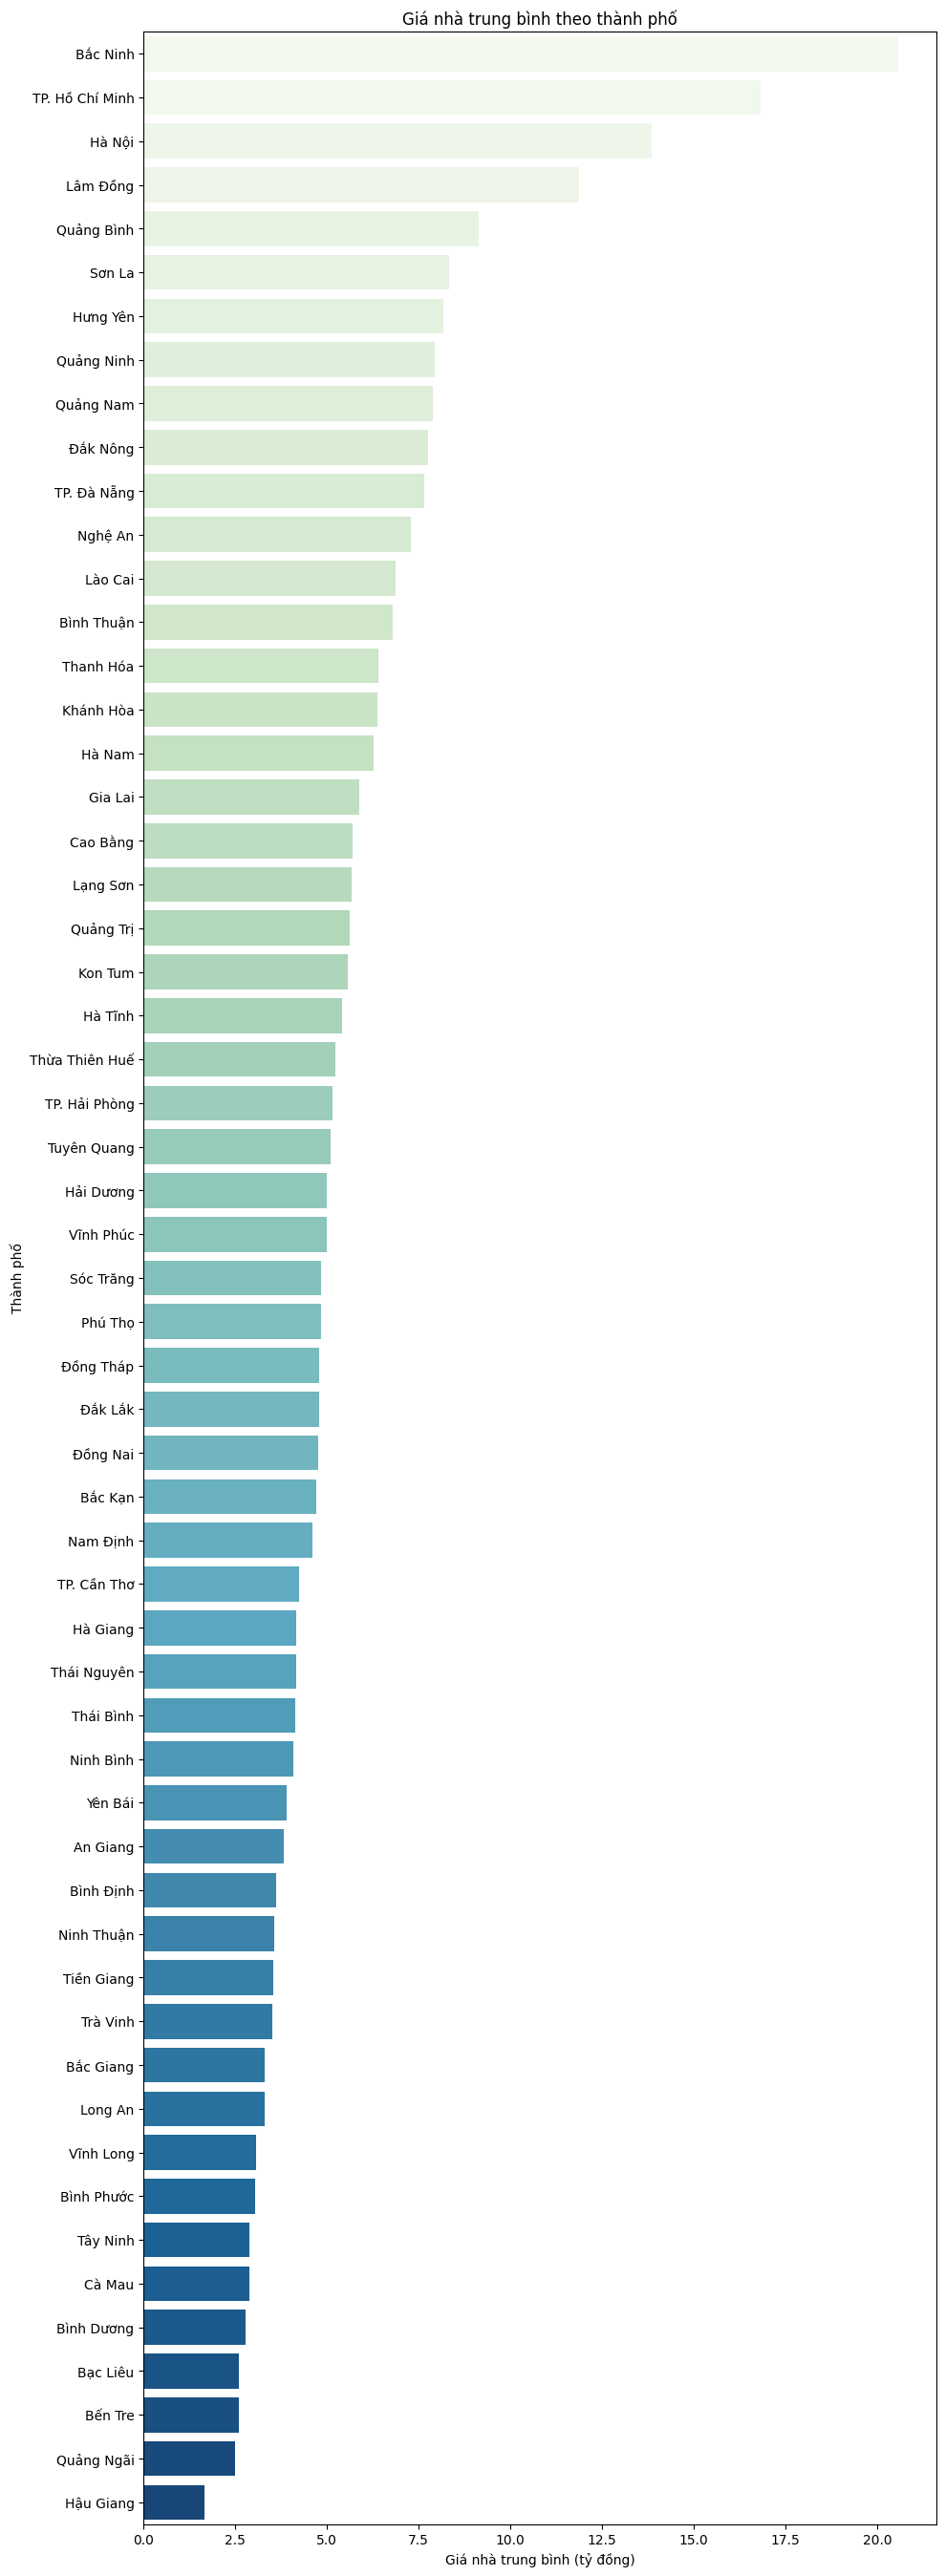

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử df_copy đã có cột 'Địa chỉ'

# Hàm để trích xuất tên thành phố từ chuỗi địa chỉ
def get_city(address):
    parts = address.split(',')
    return parts[-1].strip() if len(parts) > 1 else parts[0].strip()

# Áp dụng hàm để tạo cột 'Thành phố' mới
df_copy['Thành phố'] = df_copy['Địa chỉ'].apply(get_city)

# Tính giá nhà trung bình theo thành phố
average_price_by_city = df_copy.groupby('Thành phố')['Giá nhà (tỷ)'].mean().sort_values(ascending=False)

# Vẽ biểu đồ cột (có thể là cột ngang nếu có nhiều thành phố)
num_cities = len(average_price_by_city)
plt.figure(figsize=(10, num_cities * 0.5)) # Điều chỉnh chiều cao figure tự động

sns.barplot(x=average_price_by_city.values, y=average_price_by_city.index, palette="GnBu", errorbar=None)
plt.title('Giá nhà trung bình theo thành phố')
plt.xlabel('Giá nhà trung bình (tỷ đồng)')
plt.ylabel('Thành phố')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### **Phân tích giá nhà trung bình với khoảng rộng của sân**

<ipython-input-19-71e9be5ec2a6>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Đường trước nhà', y='Giá nhà trung bình', data=average_price_street_df, palette="GnBu", errorbar=None)


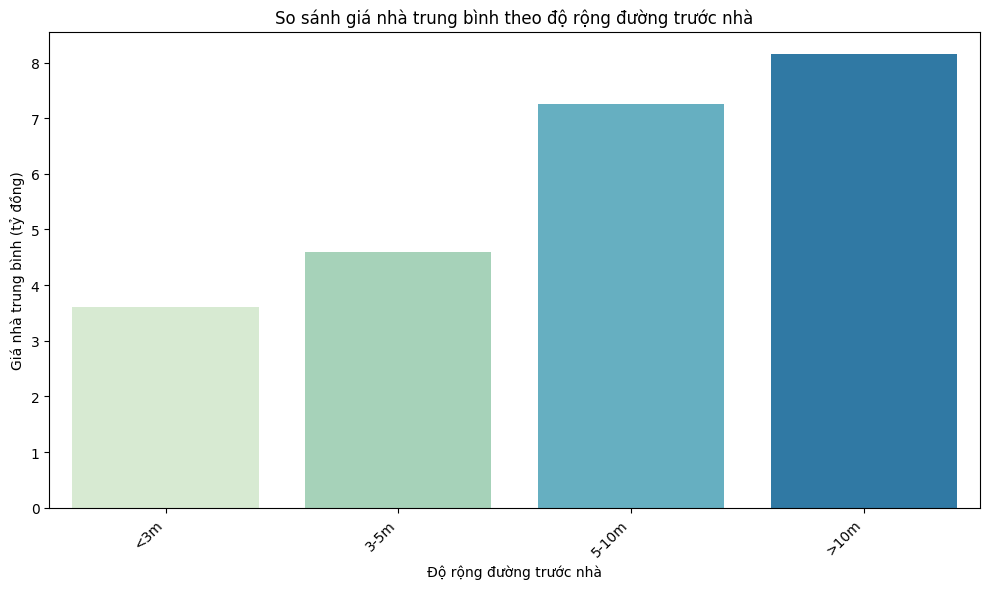

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử bạn đã xác định được các khoảng và nhãn cho 'Đường trước nhà'
bins_street = [0, 3, 5, 10, df_copy['Đường trước nhà'].max()]
labels_street = ['<3m', '3-5m', '5-10m', '>10m']

# Tạo một DataFrame tạm thời chứa giá nhà trung bình theo khoảng đường trước nhà
grouped_data_street = []
for i in range(len(bins_street) - 1):
    lower_bound = bins_street[i]
    upper_bound = bins_street[i+1]
    if i == len(bins_street) - 2:
        subset_street = df_copy[(df_copy['Đường trước nhà'] >= lower_bound)]
    else:
        subset_street = df_copy[(df_copy['Đường trước nhà'] >= lower_bound) & (df_copy['Đường trước nhà'] < upper_bound)]

    if not subset_street.empty:
        average_price_street = subset_street['Giá nhà (tỷ)'].mean()
        grouped_data_street.append({'Đường trước nhà': labels_street[i], 'Giá nhà trung bình': average_price_street})

average_price_street_df = pd.DataFrame(grouped_data_street)

# Sắp xếp theo thứ tự khoảng đường trước nhà
category_order_street = ['<3m', '3-5m', '5-10m', '>10m']
average_price_street_df['Đường trước nhà'] = pd.Categorical(average_price_street_df['Đường trước nhà'], categories=category_order_street, ordered=True)
average_price_street_df = average_price_street_df.sort_values('Đường trước nhà')

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x='Đường trước nhà', y='Giá nhà trung bình', data=average_price_street_df, palette="GnBu", errorbar=None)
plt.title('So sánh giá nhà trung bình theo độ rộng đường trước nhà')
plt.xlabel('Độ rộng đường trước nhà')
plt.ylabel('Giá nhà trung bình (tỷ đồng)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Phân tích giá nhà trung bình theo các đặc điểm khác của bất động sản**

<ipython-input-20-8b1fb9c49a4f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Phòng ngủ', y='Giá nhà (tỷ)', data=df_copy, palette="GnBu", errorbar=None)


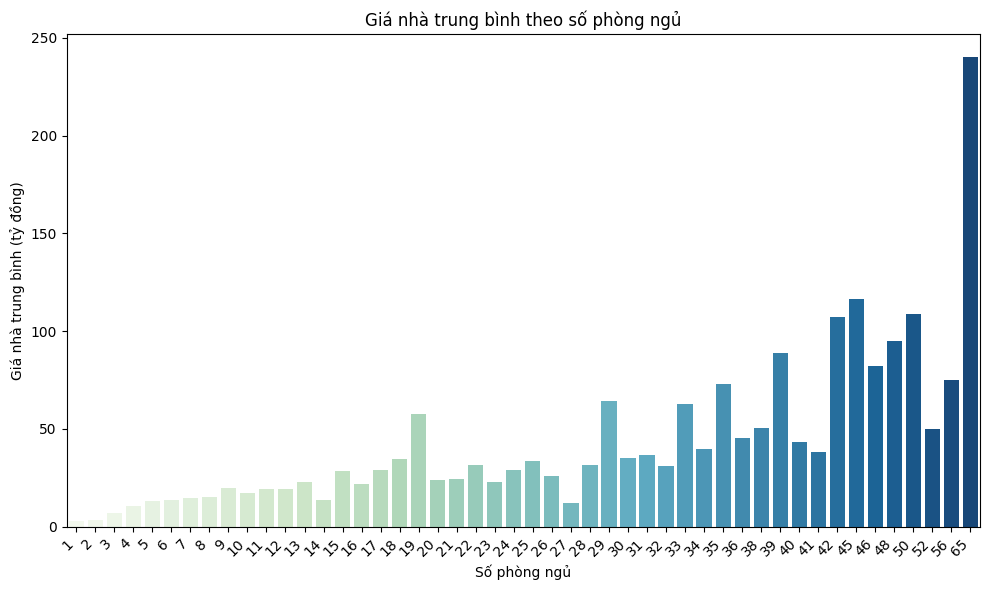

<ipython-input-20-8b1fb9c49a4f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Số toilet', y='Giá nhà (tỷ)', data=df_copy, palette="GnBu", errorbar=None)


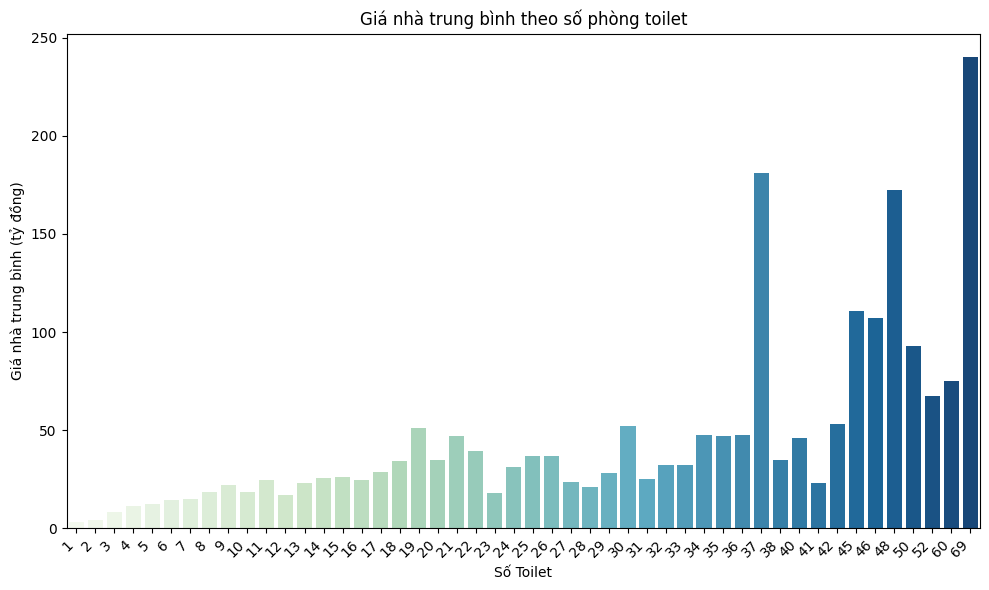

<ipython-input-20-8b1fb9c49a4f>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Số phòng khách', y='Giá nhà (tỷ)', data=df_copy, palette="GnBu", errorbar=None)


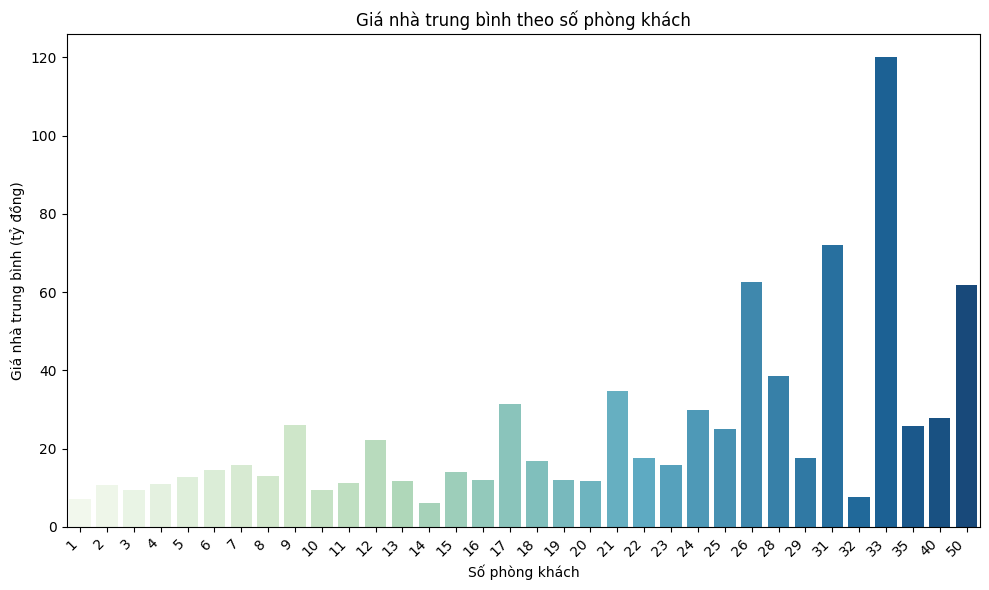

<ipython-input-20-8b1fb9c49a4f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pháp lý', y='Giá nhà (tỷ)', data=df_copy, palette="GnBu", errorbar=None)


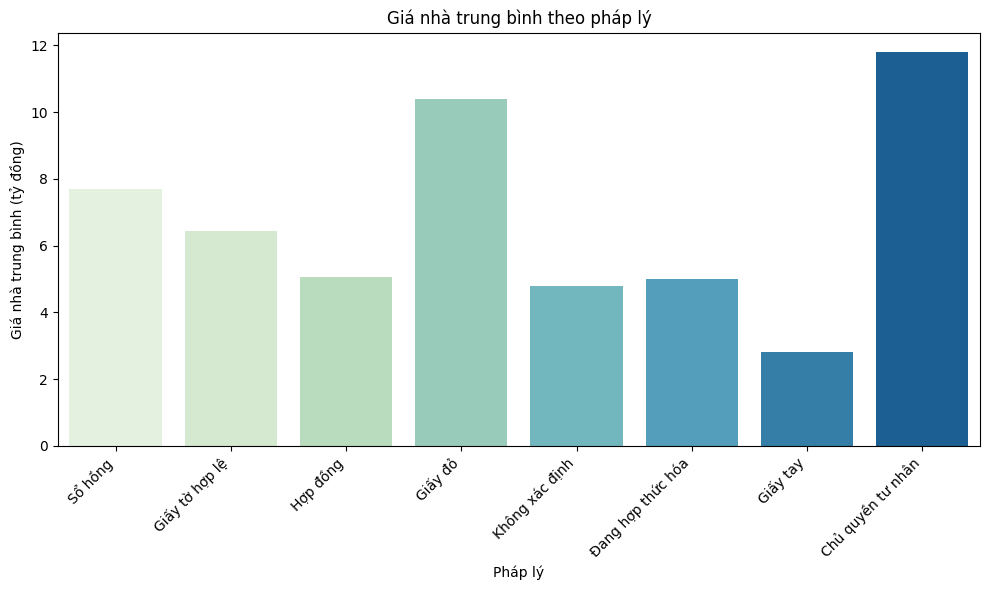

<ipython-input-20-8b1fb9c49a4f>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loại địa ốc', y='Giá nhà (tỷ)', data=df_copy, palette="GnBu", errorbar=None)


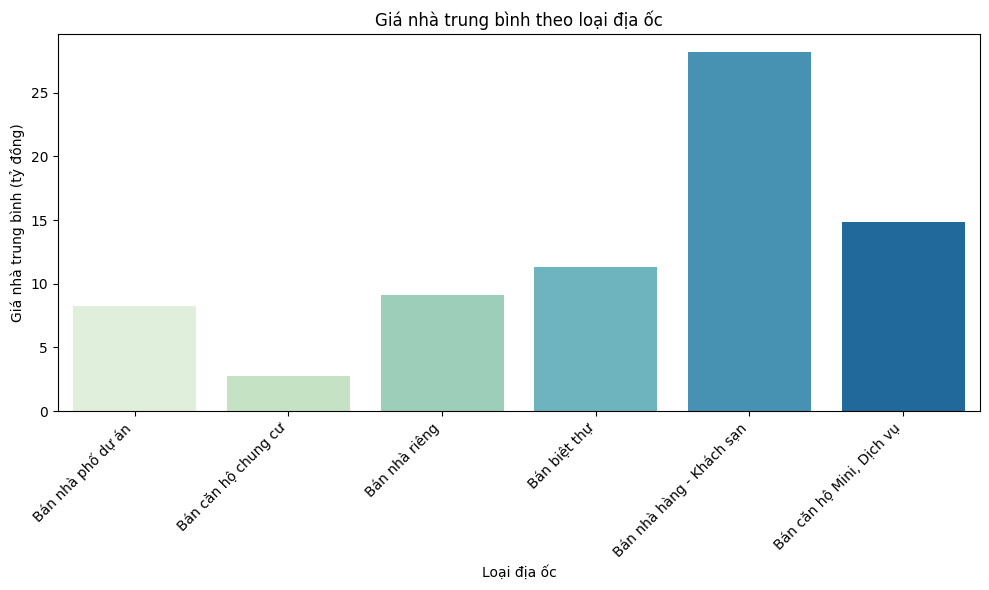

In [ ]:
#Phòng ngủ
plt.figure(figsize=(10, 6))
sns.barplot(x='Phòng ngủ', y='Giá nhà (tỷ)', data=df_copy, palette="GnBu", errorbar=None)
plt.title('Giá nhà trung bình theo số phòng ngủ')
plt.xlabel('Số phòng ngủ')
plt.ylabel('Giá nhà trung bình (tỷ đồng)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Toilet
plt.figure(figsize=(10, 6))
sns.barplot(x='Số toilet', y='Giá nhà (tỷ)', data=df_copy, palette="GnBu", errorbar=None)
plt.title('Giá nhà trung bình theo số phòng toilet')
plt.xlabel('Số Toilet')
plt.ylabel('Giá nhà trung bình (tỷ đồng)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Phòng khách
plt.figure(figsize=(10, 6))
sns.barplot(x='Số phòng khách', y='Giá nhà (tỷ)', data=df_copy, palette="GnBu", errorbar=None)
plt.title('Giá nhà trung bình theo số phòng khách')
plt.xlabel('Số phòng khách')
plt.ylabel('Giá nhà trung bình (tỷ đồng)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Pháp lý
plt.figure(figsize=(10, 6))
sns.barplot(x='Pháp lý', y='Giá nhà (tỷ)', data=df_copy, palette="GnBu", errorbar=None)
plt.title('Giá nhà trung bình theo pháp lý')
plt.xlabel('Pháp lý')
plt.ylabel('Giá nhà trung bình (tỷ đồng)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Loại địa ốc
plt.figure(figsize=(10, 6))
sns.barplot(x='Loại địa ốc', y='Giá nhà (tỷ)', data=df_copy, palette="GnBu", errorbar=None)
plt.title('Giá nhà trung bình theo loại địa ốc')
plt.xlabel('Loại địa ốc')
plt.ylabel('Giá nhà trung bình (tỷ đồng)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Correlation Matrix**

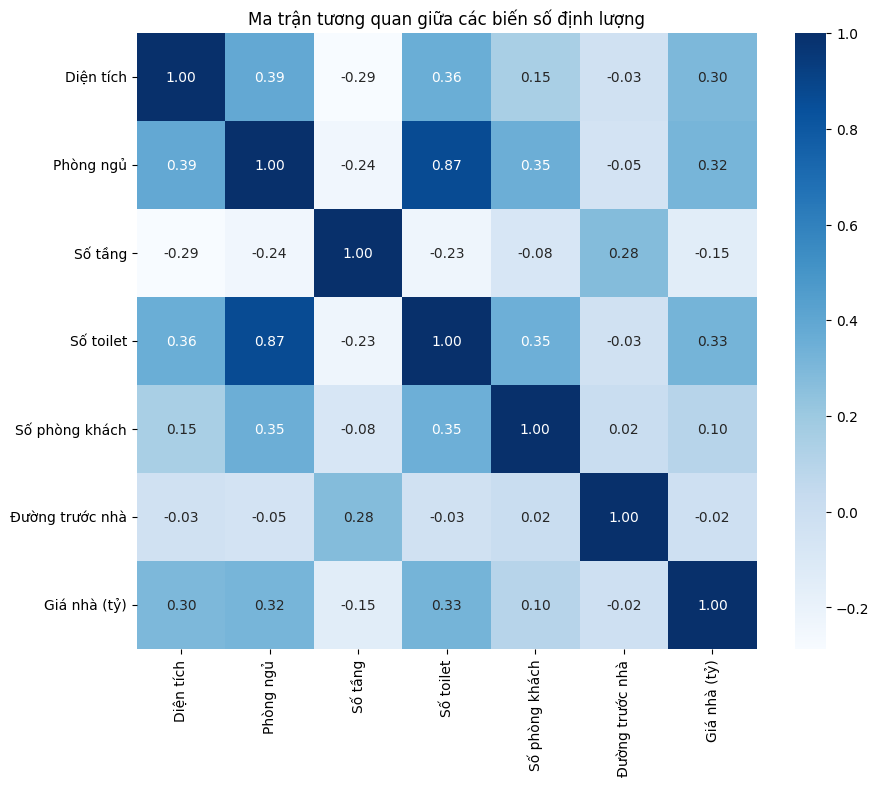

In [ ]:
# Chọn các cột số để tính tương quan
numerical_cols = ['Diện tích', 'Phòng ngủ', 'Số tầng', 'Số toilet', 'Số phòng khách', 'Đường trước nhà', 'Giá nhà (tỷ)']

# Tính ma trận tương quan
correlation_matrix = df_copy[numerical_cols].corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Ma trận tương quan giữa các biến số định lượng')
plt.show()

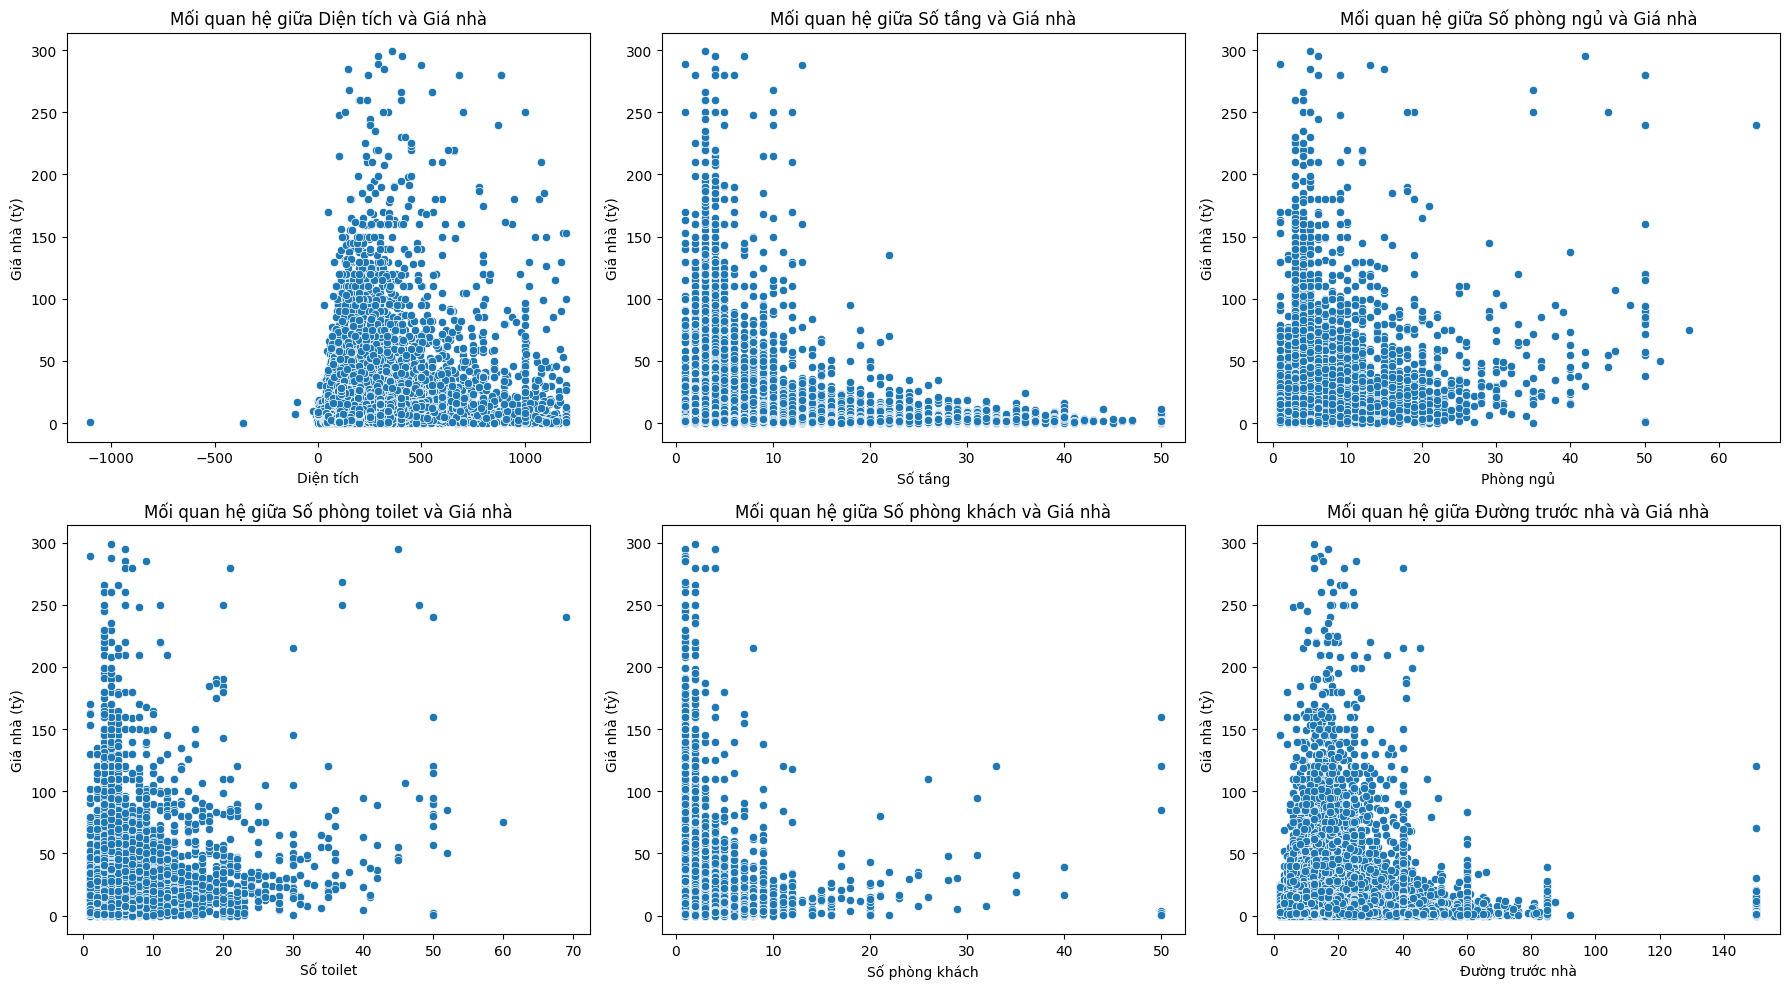

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Danh sách các cặp (x, y) cần vẽ
plot_features = [
    ('Diện tích', 'Giá nhà (tỷ)', 'Mối quan hệ giữa Diện tích và Giá nhà'),
    ('Số tầng', 'Giá nhà (tỷ)', 'Mối quan hệ giữa Số tầng và Giá nhà'),
    ('Phòng ngủ', 'Giá nhà (tỷ)', 'Mối quan hệ giữa Số phòng ngủ và Giá nhà'),
    ('Số toilet', 'Giá nhà (tỷ)', 'Mối quan hệ giữa Số phòng toilet và Giá nhà'),
    ('Số phòng khách', 'Giá nhà (tỷ)', 'Mối quan hệ giữa Số phòng khách và Giá nhà'),
    ('Đường trước nhà', 'Giá nhà (tỷ)', 'Mối quan hệ giữa Đường trước nhà và Giá nhà')
]

# Tạo figure và axes: 2 hàng, 3 cột
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Flatten axes để dễ truy cập
axes = axes.flatten()

# Vẽ từng biểu đồ
for i, (x, y, title) in enumerate(plot_features):
    sns.scatterplot(data=df_copy, x=x, y=y, ax=axes[i])
    axes[i].set_title(title)
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)

plt.tight_layout()
plt.show()


Kích thước DataFrame ban đầu: (61833, 13)
Kích thước DataFrame sau khi loại bỏ ngoại lai ở các cột: (52905, 13)


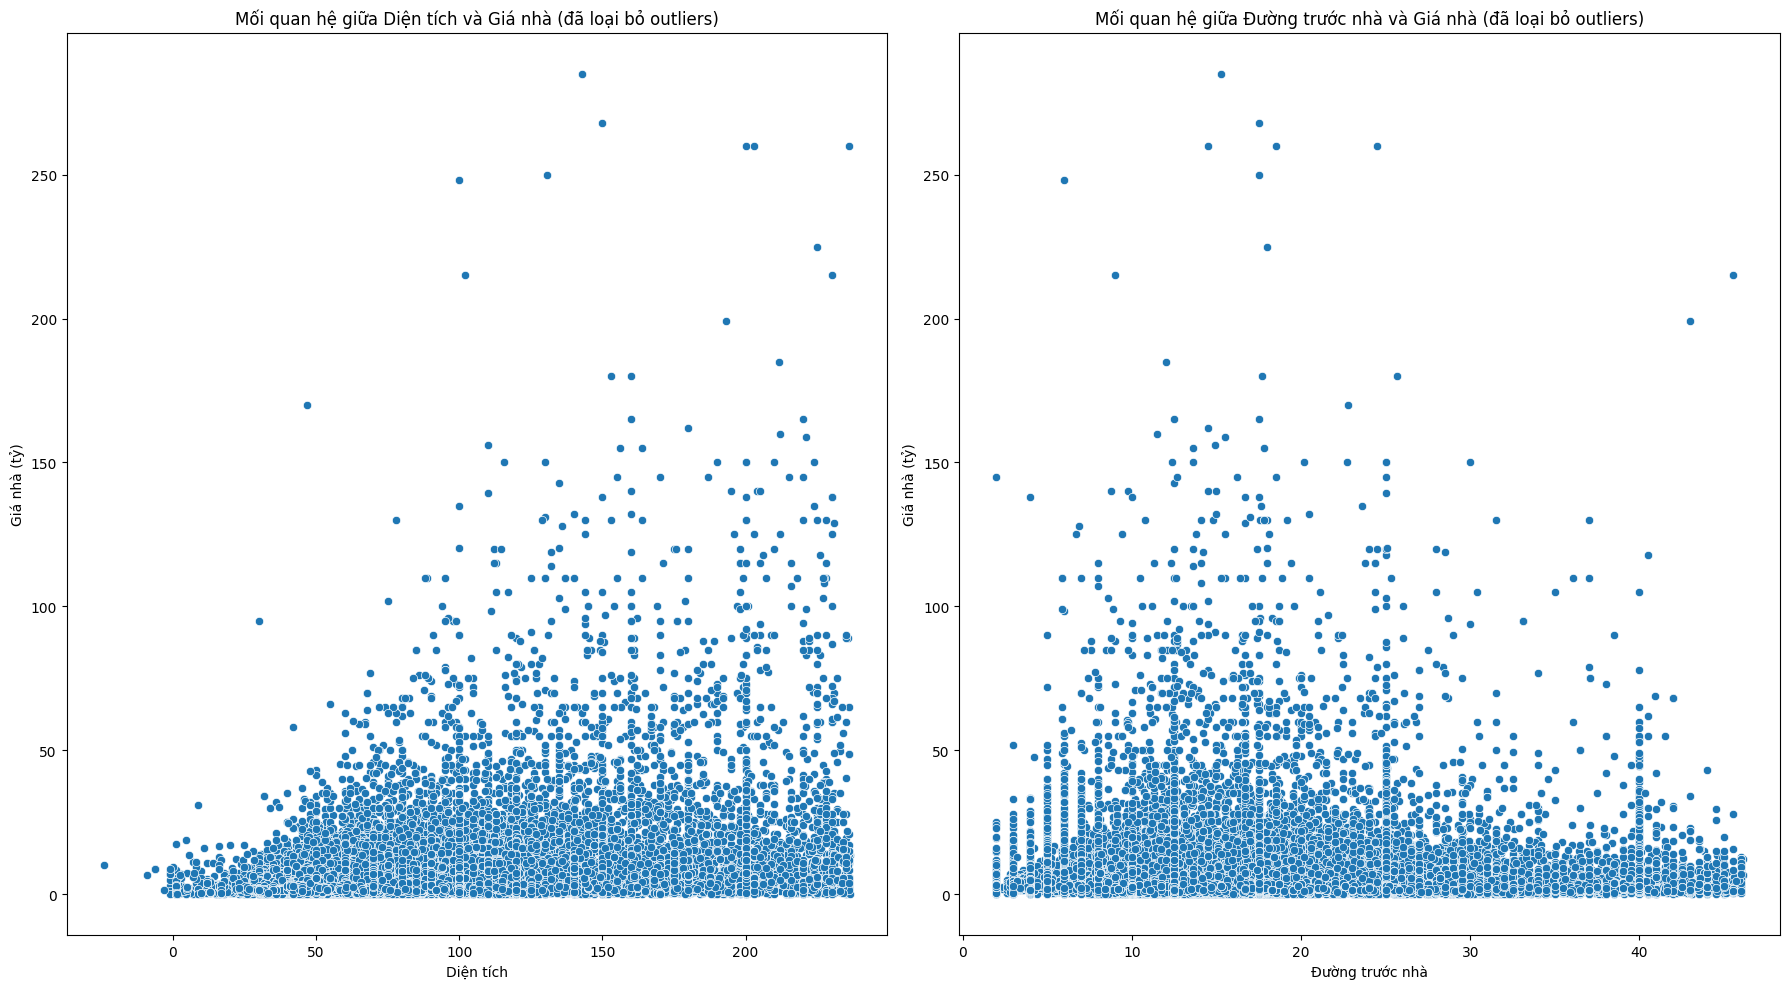

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Danh sách các cột số mà bạn muốn loại bỏ ngoại lai
numerical_cols_to_clean = ['Diện tích', 'Đường trước nhà']

# Tạo một bản sao của DataFrame để không thay đổi DataFrame gốc
df_copy_cleaned = df_copy.copy()

# Loại bỏ ngoại lai cho từng cột
for col in numerical_cols_to_clean:
    df_copy_cleaned = remove_outliers_iqr(df_copy_cleaned, col)

print(f"Kích thước DataFrame ban đầu: {df_copy.shape}")
print(f"Kích thước DataFrame sau khi loại bỏ ngoại lai ở các cột: {df_copy_cleaned.shape}")

# Danh sách các cặp (x, y) cần vẽ
plot_features_cleaned = [
    ('Diện tích', 'Giá nhà (tỷ)', 'Mối quan hệ giữa Diện tích và Giá nhà (đã loại bỏ outliers)'),
    ('Đường trước nhà', 'Giá nhà (tỷ)', 'Mối quan hệ giữa Đường trước nhà và Giá nhà (đã loại bỏ outliers)')
]

# Tạo figure và axes: 2 hàng, 3 cột
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Flatten axes để dễ truy cập
axes = axes.flatten()

# Vẽ từng biểu đồ với DataFrame đã làm sạch
for i, (x, y, title) in enumerate(plot_features_cleaned):
    sns.scatterplot(data=df_copy_cleaned, x=x, y=y, ax=axes[i])
    axes[i].set_title(title)
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)

plt.tight_layout()
plt.show()

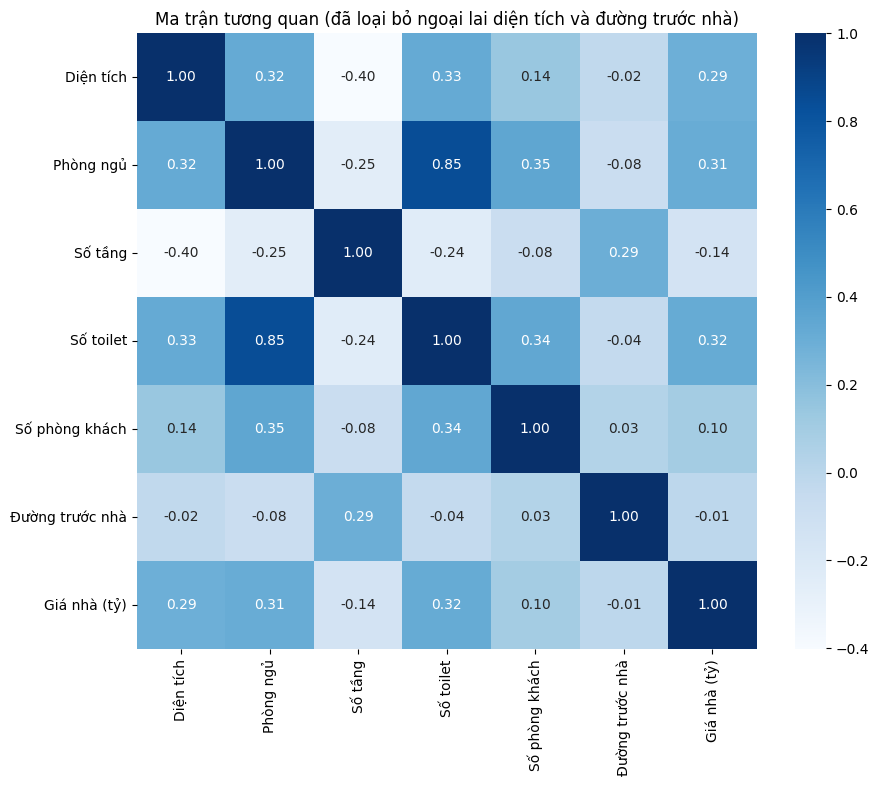

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['Diện tích', 'Phòng ngủ', 'Số tầng', 'Số toilet', 'Số phòng khách', 'Đường trước nhà', 'Giá nhà (tỷ)']

correlation_matrix_no_outliers_area = df_copy_cleaned[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_no_outliers_area, annot=True, cmap='Blues', fmt=".2f")
plt.title('Ma trận tương quan (đã loại bỏ ngoại lai diện tích và đường trước nhà)')
plt.show()

### **Mối quan hệ giữa Diện tích và Giá nhà theo loại địa ốc**

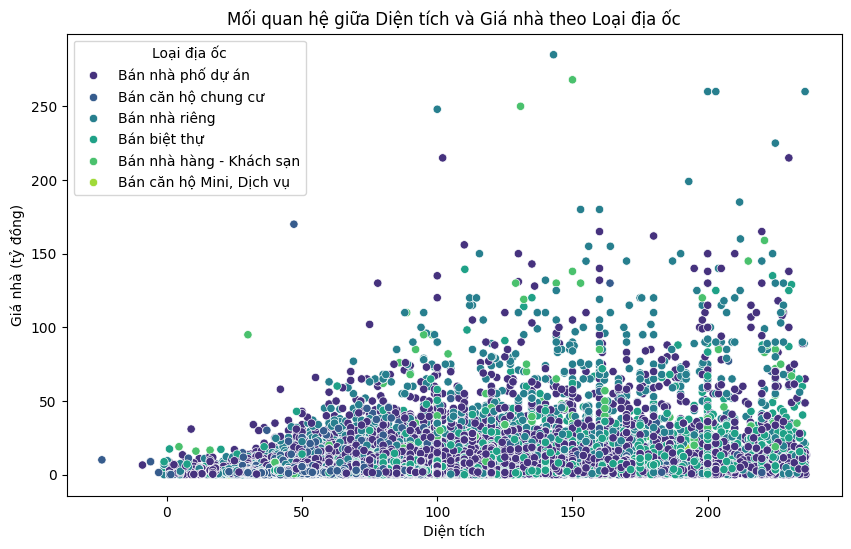

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Diện tích', y='Giá nhà (tỷ)', hue='Loại địa ốc', data=df_copy_cleaned, palette="viridis")
plt.title('Mối quan hệ giữa Diện tích và Giá nhà theo Loại địa ốc')
plt.xlabel('Diện tích')
plt.ylabel('Giá nhà (tỷ đồng)')
plt.legend(title='Loại địa ốc')
plt.show()

In [ ]:
df_copy_cleaned.info()
df_copy_cleaned.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 52905 entries, 0 to 61831
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diện tích        52905 non-null  float64
 1   Phòng ngủ        52905 non-null  Int64  
 2   Số tầng          52905 non-null  Int64  
 3   Số toilet        52905 non-null  Int64  
 4   Số phòng khách   52905 non-null  Int64  
 5   Loại địa ốc      52905 non-null  object 
 6   Địa chỉ          52905 non-null  object 
 7   Pháp lý          52905 non-null  object 
 8   Hướng nhà        52905 non-null  object 
 9   Đường trước nhà  52905 non-null  float64
 10  Giá nhà          52905 non-null  object 
 11  Giá nhà (tỷ)     52905 non-null  float64
 12  Thành phố        52905 non-null  object 
dtypes: Int64(4), float64(3), object(6)
memory usage: 5.9+ MB


,0
Diện tích,0
Phòng ngủ,0
Số tầng,0
Số toilet,0
Số phòng khách,0
Loại địa ốc,0
Địa chỉ,0
Pháp lý,0
Hướng nhà,0
Đường trước nhà,0


# **Training**

# ***Nội dung một***
Đầu tiên, chúng ta sẽ chạy LazyRegressor để tự động thử nghiệm trên tất cả mô hình trên tập dữ liệu huấn luyện (X_train) và tập kiểm tra (X_test). Kết quả sẽ được đánh giá dựa trên các chỉ số như R² (đo lường mức độ giải thích biến thiên của dữ liệu) và RMSE (sai số trung bình), giúp xếp hạng các mô hình từ tốt đến tệ. Sau khi có bảng xếp hạng, chúng ta sẽ lấy 3 mô hình có R² cao nhất làm top 3, chọn mô hình ở vị trí giữa (khoảng thứ 13/30..) làm mô hình trung bình, và chọn mô hình cuối cùng (R² thấp nhất) làm mô hình tệ.

Tiếp theo, với top 3 mô hình, chúng ta sẽ sử dụng RandomizedSearchCV để tìm kiếm các tham số tối ưu cho từng mô hình, sau đó huấn luyện lại chúng trên toàn bộ dữ liệu (X_full, khoảng 42,000 mẫu). Quá trình này sẽ giúp cải thiện hiệu suất của từng mô hình, và kết quả sẽ được đánh giá lại trên tập kiểm tra để so sánh với kết quả ban đầu. Đối với mô hình trung bình và mô hình tệ, chúng ta sẽ huấn luyện nhanh trên X_train và đánh giá trên X_test để thấy sự khác biệt rõ rệt so với top 3.

Cuối cùng, để minh họa, chúng ta sẽ vẽ biểu đồ so sánh R² của các mô hình, bao gồm biểu đồ dự đoán so với thực tế cho top 3. Tất cả kết quả, bao gồm mô hình đã huấn luyện và bảng so sánh, sẽ được lưu vào các file CSV và file mô hình (.pkl) để sử dụng sau này. Phần phụ lục sẽ chứa kết quả của mô hình trung bình và mô hình tệ, giúp làm nổi bật sự vượt trội của top 3.

## Cài đặt các thư viện cần thiết

In [ ]:
!pip install lazypredict

  Using cached lazypredict-0.2.16-py2.py3-none-any.whl.metadata (13 kB)
  Using cached pytest_runner-6.0.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached mlflow-2.22.0-py3-none-any.whl.metadata (30 kB)
  Using cached mlflow_skinny-2.22.0-py3-none-any.whl.metadata (31 kB)
  Using cached alembic-1.15.2-py3-none-any.whl.metadata (7.3 kB)
  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached graphene-3.4.3-py2.py3-none-any.whl.metadata (6.9 kB)
  Using cached gunicorn-23.0.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached databricks_sdk-0.52.0-py3-none-any.whl.metadata (39 kB)
  Using cached fastapi-0.115.12-py3-none-any.whl.metadata (27 kB)
  Using cached uvicorn-0.34.2-py3-none-any.whl.metadata (6.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder # Import LabelEncoder here
from sklearn.impute import KNNImputer
from lazypredict.Supervised import LazyRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import psutil
import warnings
import joblib
import uuid

## Tắt cảnh báo, kiểm tra bộ nhớ

In [ ]:
import warnings
# Tắt cảnh báo
warnings.filterwarnings('ignore')

# Kiểm tra bộ nhớ
def check_memory():
    mem = psutil.virtual_memory()
    used_percent = mem.percent
    print(f"Bộ nhớ sử dụng: {used_percent}%")
    if used_percent > 80:
        print("Cảnh báo: Bộ nhớ sử dụng cao. Giảm kích thước dữ liệu.")
        return False
    return True

check_memory()

Bộ nhớ sử dụng: 11.8%


True

# **1. Chuẩn bị dữ liệu**

In [ ]:
features = ['Diện tích', 'Phòng ngủ', 'Số tầng', 'Số toilet', 'Số phòng khách',
            'Đường trước nhà', 'Pháp lý', 'Hướng nhà', 'Loại địa ốc', 'Thành phố']
target = 'Giá nhà (tỷ)'
categorical_cols = ['Pháp lý', 'Hướng nhà', 'Loại địa ốc', 'Thành phố']
numerical_cols = [f for f in features if f not in categorical_cols]

## Kích thước dữ liệu đầu vào

In [ ]:
# Giả định df_copy_cleaned là dữ liệu đầu vào
df_model = df_copy_cleaned[features + [target]].copy()
print(f"Kích thước dữ liệu ban đầu: {df_model.shape}")

Kích thước dữ liệu ban đầu: (52905, 11)


In [ ]:
# Mã hóa các cột phân loại
label_encoders = {}
for col in ['Pháp lý', 'Hướng nhà', 'Loại địa ốc', 'Thành phố']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))  # Chuyển sang str để tránh lỗi
    label_encoders[col] = le

# Xóa các hàng có giá trị NaN (nếu còn)
df_model = df_model.dropna()
print(f"Kích thước dữ liệu sau khi xóa NaN: {df_model.shape}")

Kích thước dữ liệu sau khi xóa NaN: (52905, 11)


In [ ]:
sample_fraction = 0.5
df_model = df_model.sample(frac=sample_fraction, random_state=42)
print(f"Kích thước dữ liệu sau khi lấy mẫu: {df_model.shape}")

Kích thước dữ liệu sau khi lấy mẫu: (26452, 11)



Kiểm tra tương quan giữa các đặc trưng số:


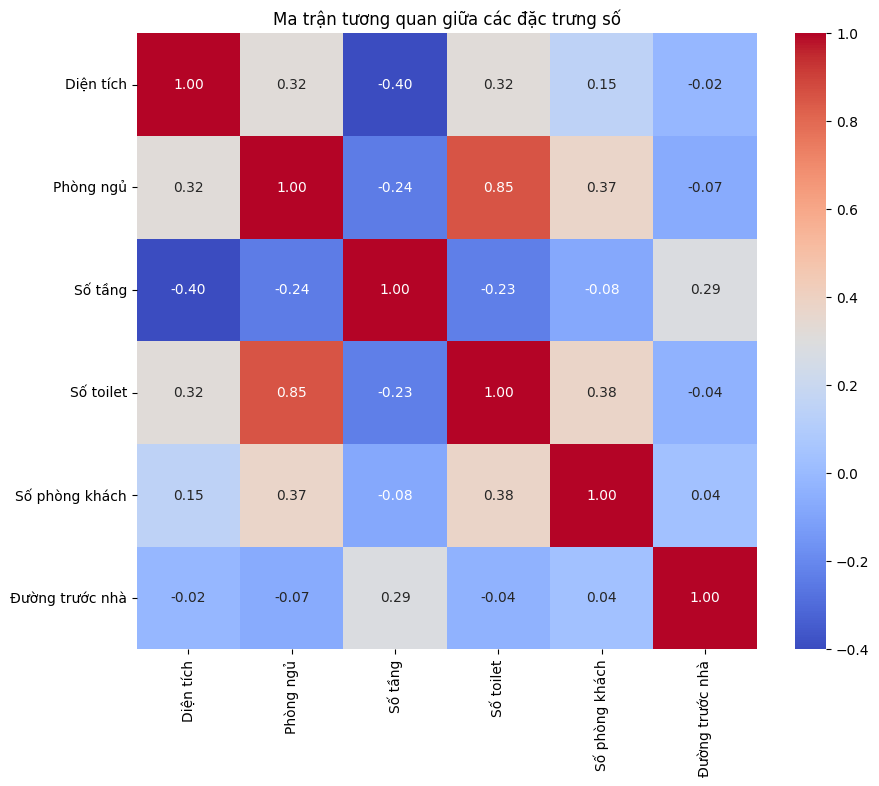

In [ ]:
# Kiểm tra tương quan
print("\nKiểm tra tương quan giữa các đặc trưng số:")
corr_matrix = df_model[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan giữa các đặc trưng số')
plt.show()

## Loại bỏ ngoại lai


Kiểm tra ngoại lai trước khi xử lý:
Cột Giá nhà (tỷ):
 - Số lượng ngoại lai: 2523 (9.54%)
 - Giới hạn dưới: -5.57, Giới hạn trên: 13.82
 - Giá trị ngoại lai (min, max): 13.86, 260.00


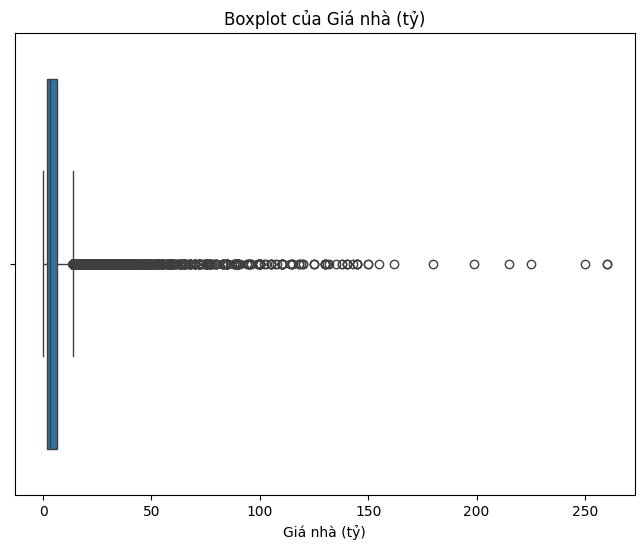

Ngoại lai ở Giá nhà (tỷ) chiếm 9.54%. Kiểm tra ngữ cảnh trước khi xóa.
Dữ liệu ngoại lai mẫu:
       Diện tích  Phòng ngủ  Số tầng  Số toilet  Số phòng khách  \
17258     110.00          6        7          8               2   
21164     162.00          4        2          4               1   
34740     213.00          4        3          5               3   
48778     103.40         12        5         12               1   
672       144.00         15        4         14               1   

       Đường trước nhà  Pháp lý  Hướng nhà  Loại địa ốc  Thành phố  \
17258            17.50        3          8            5         15   
21164            15.30        3          5            4         39   
34740             7.90        6          8            4         40   
48778            11.70        6          8            3          1   
672              34.00        3          8            4         31   

       Giá nhà (tỷ)  
17258         28.00  
21164         15.00  
34740         60

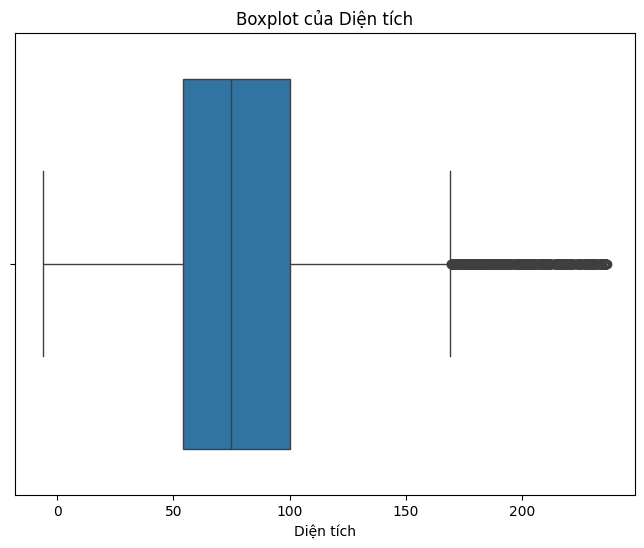

Cột Phòng ngủ:
 - Số lượng ngoại lai: 603 (2.52%)
 - Giới hạn dưới: -1.00, Giới hạn trên: 7.00
 - Giá trị ngoại lai (min, max): 8.00, 50.00


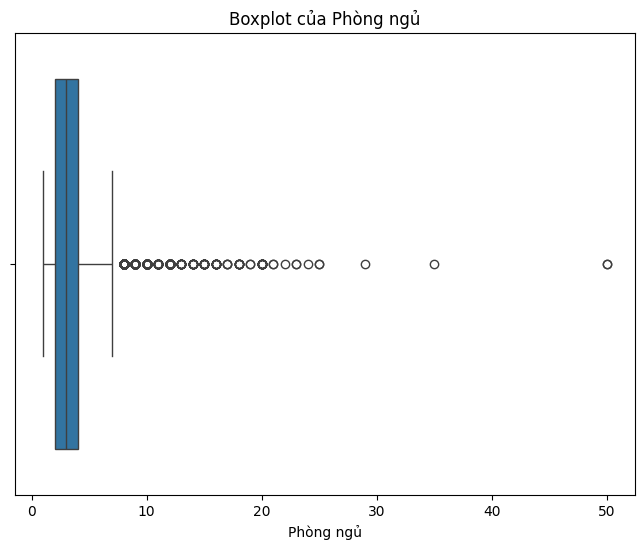

Cột Số tầng:
 - Số lượng ngoại lai: 1032 (4.31%)
 - Giới hạn dưới: -10.50, Giới hạn trên: 25.50
 - Giá trị ngoại lai (min, max): 26.00, 50.00


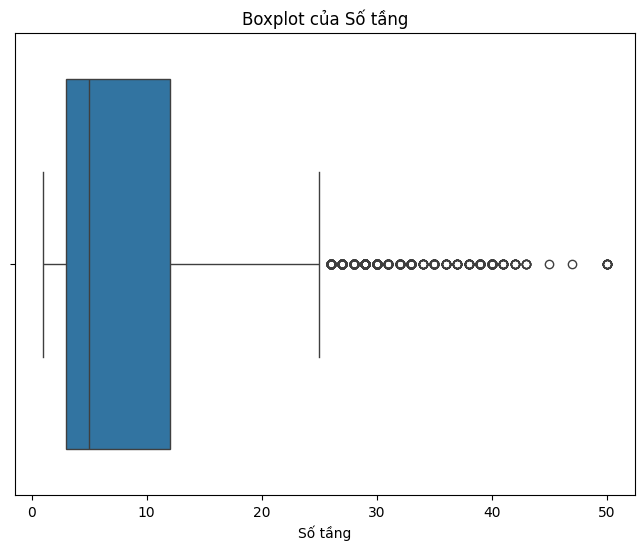

Cột Số toilet:
 - Số lượng ngoại lai: 2107 (8.81%)
 - Giới hạn dưới: 0.50, Giới hạn trên: 4.50
 - Giá trị ngoại lai (min, max): 5.00, 50.00


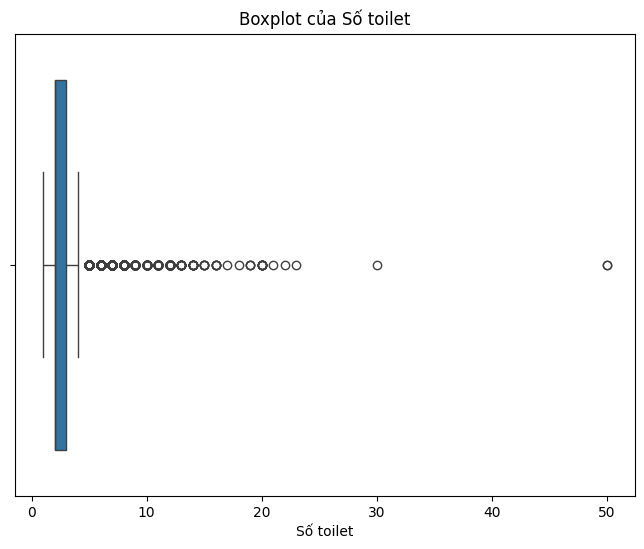

Cột Số phòng khách:
 - Số lượng ngoại lai: 4123 (17.23%)
 - Giới hạn dưới: 1.00, Giới hạn trên: 1.00
 - Giá trị ngoại lai (min, max): 2.00, 50.00


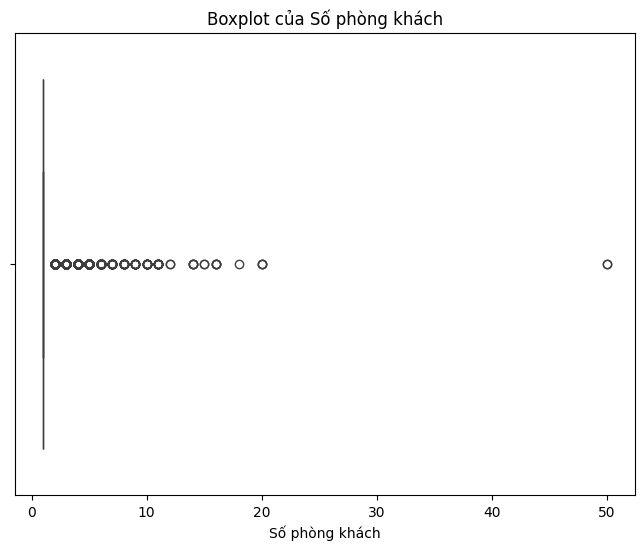

Cột Đường trước nhà:
 - Số lượng ngoại lai: 0 (0.00%)
 - Giới hạn dưới: -11.66, Giới hạn trên: 46.10


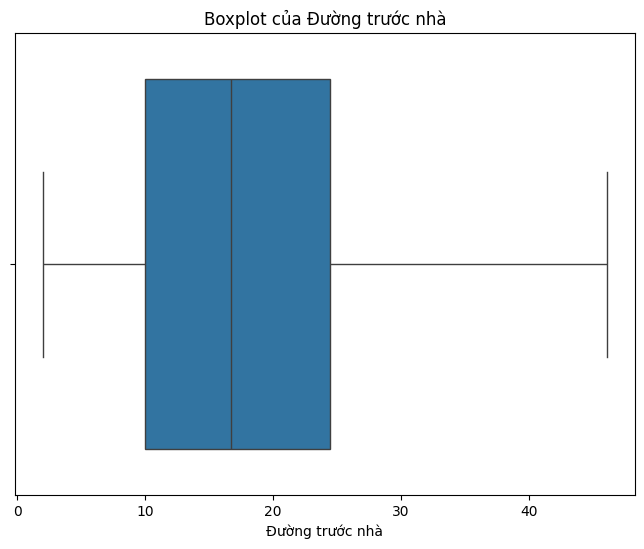

Kích thước dữ liệu sau khi xử lý ngoại lai: (23929, 11)


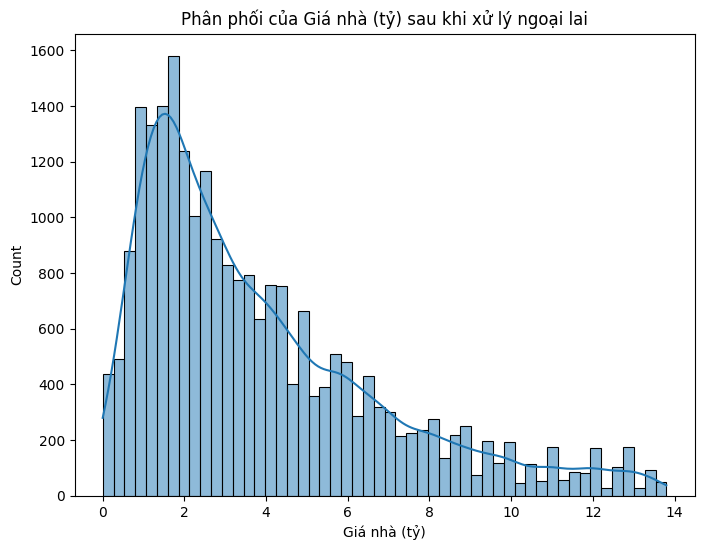

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hàm kiểm tra ngoại lai
def check_outliers(df, column, plot=True):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Tìm các điểm ngoại lai
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    outlier_percentage = len(outliers) / len(df) * 100
    print(f"Cột {column}:")
    print(f" - Số lượng ngoại lai: {len(outliers)} ({outlier_percentage:.2f}%)")
    print(f" - Giới hạn dưới: {lower_bound:.2f}, Giới hạn trên: {upper_bound:.2f}")
    if not outliers.empty:
        print(f" - Giá trị ngoại lai (min, max): {outliers.min():.2f}, {outliers.max():.2f}")

    # Vẽ boxplot
    if plot:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot của {column}')
        plt.show()

    return outliers, outlier_percentage, lower_bound, upper_bound

# Hàm xóa ngoại lai
def remove_outliers(df, column, lower_bound, upper_bound):
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Hàm giới hạn ngoại lai
def cap_outliers(df, column, lower_bound, upper_bound):
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Kiểm tra ngoại lai trước khi xử lý
print("\nKiểm tra ngoại lai trước khi xử lý:")
target = 'Giá nhà (tỷ)'
numerical_cols = ['Diện tích', 'Phòng ngủ', 'Số tầng', 'Số toilet', 'Số phòng khách', 'Đường trước nhà']
all_cols = [target] + numerical_cols

for col in all_cols:
    outliers, outlier_percentage, lower_bound, upper_bound = check_outliers(df_model, col)

    # Quyết định xử lý ngoại lai
    if col == target:
        if outlier_percentage > 10:
            print(f"Cảnh báo: Ngoại lai ở {col} chiếm {outlier_percentage:.2f}%. Khuyến nghị giữ hoặc giới hạn ngoại lai.")
            df_model = cap_outliers(df_model, col, lower_bound, upper_bound)
            print(f"Đã giới hạn ngoại lai cho {col}.")
        elif 5 <= outlier_percentage <= 10:
            print(f"Ngoại lai ở {col} chiếm {outlier_percentage:.2f}%. Kiểm tra ngữ cảnh trước khi xóa.")
            # Xem dữ liệu ngoại lai
            outlier_rows = df_model[(df_model[col] < lower_bound) | (df_model[col] > upper_bound)]
            print("Dữ liệu ngoại lai mẫu:")
            print(outlier_rows[features + [target]].head())
            # Quyết định xóa hoặc giữ dựa trên ngữ cảnh (giả định xóa)
            df_model = remove_outliers(df_model, col, lower_bound, upper_bound)
            print(f"Đã xóa ngoại lai cho {col}.")
        else:
            print(f"Ngoại lai ở {col} chiếm {outlier_percentage:.2f}%. An toàn để xóa.")
            df_model = remove_outliers(df_model, col, lower_bound, upper_bound)
            print(f"Đã xóa ngoại lai cho {col}.")

print(f"Kích thước dữ liệu sau khi xử lý ngoại lai: {df_model.shape}")

# Kiểm tra phân phối sau khi xử lý
plt.figure(figsize=(8, 6))
sns.histplot(df_model[target], kde=True)
plt.title(f'Phân phối của {target} sau khi xử lý ngoại lai')
plt.show()


Kiểm tra tương quan giữa các đặc trưng số:


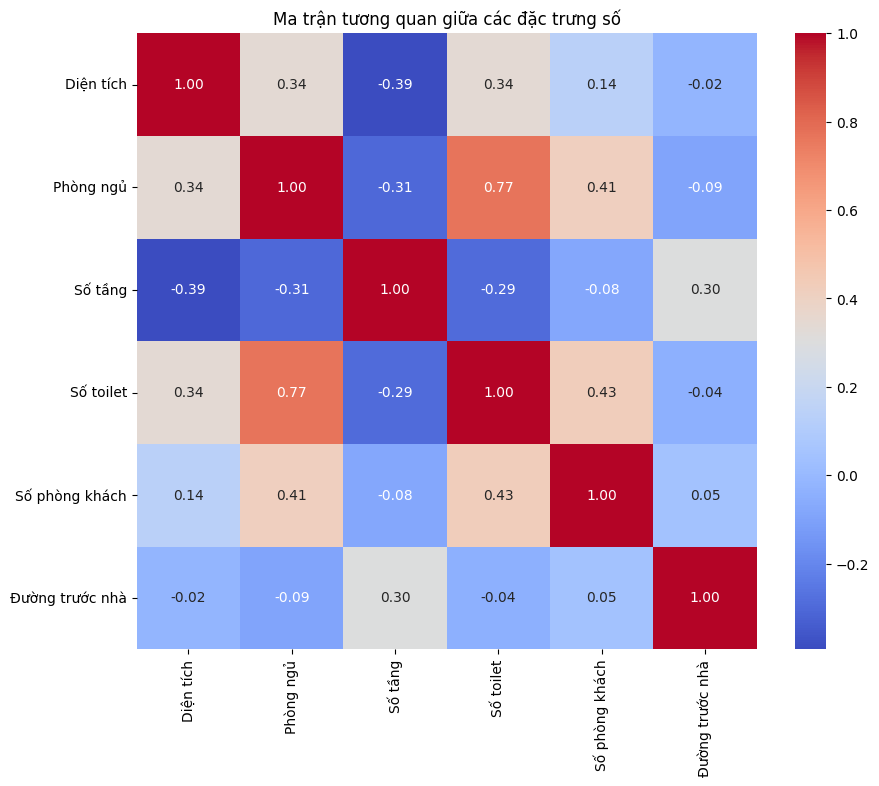

In [ ]:
# Kiểm tra tương quan
print("\nKiểm tra tương quan giữa các đặc trưng số:")
corr_matrix = df_model[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan giữa các đặc trưng số')
plt.show()

##  Loại bỏ đặc trưng có tương quan cao và Tạo pipeline xử lý dữ liệu

In [ ]:
# Loại bỏ đặc trưng có tương quan cao (>0.8)
# Calculate the correlation matrix
corr_matrix = df_model[numerical_cols].corr()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
if to_drop:
    print(f"Loại bỏ các đặc trưng có tương quan cao: {to_drop}")
    numerical_cols = [f for f in numerical_cols if f not in to_drop]
    features = numerical_cols + categorical_cols
    df_model = df_model[features + [target]]
# Tạo pipeline xử lý dữ liệu
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ])

In [ ]:
# Log-transform mục tiêu
y = np.log1p(df_model[target])
X = df_model[features]

# Fit and transform the preprocessor on the features
X_scaled = preprocessor.fit_transform(X) # Added this line to define X_scaled

# Kiểm tra kích thước và khớp dữ liệu
print(f"Kích thước X_scaled: {X_scaled.shape}, Kích thước y: {y.shape}")
if X_scaled.shape[0] != y.shape[0]:
    raise ValueError("Kích thước X và y không khớp. Kiểm tra lại dữ liệu.")

Kích thước X_scaled: (23929, 81), Kích thước y: (23929,)


In [ ]:
# Tách dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Kích thước tập huấn luyện: {X_train.shape}, Tập kiểm tra: {X_test.shape}")

Kích thước tập huấn luyện: (19143, 10), Tập kiểm tra: (4786, 10)


# **2. Huấn luyện mô hình với LazyPredict**

Đoạn mã sử dụng thư viện LazyPredict để nhanh chóng huấn luyện và đánh giá nhiều mô hình hồi quy phổ biến mà không cần viết thủ công từng mô hình.

In [ ]:

# 2. Huấn luyện mô hình với LazyPredict
try:
    reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
    models, predictions = reg.fit(X_train, X_test, y_train, y_test)
    print("Chỉ số đánh giá của tất cả mô hình:")
    print(models)
except Exception as e:
    print(f"Lỗi khi chạy LazyRegressor: {e}")
    models = pd.DataFrame()


  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 691
[LightGBM] [Info] Number of data points in the train set: 19146, number of used features: 10
[LightGBM] [Info] Start training from score 1.404869
Chỉ số đánh giá của tất cả mô hình:
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LGBMRegressor                                0.50       0.50  0.43        0.28
HistGradientBoostingRegressor                0.50       0.50  0.43        0.45
XGBRegressor                                 0.49       0.50  0.43        0.33
RandomForestRegressor                        0.48       0.48  0.43        9.57
ExtraTreesRegressor                          0.47       0.47  0.44        7.03
Gradie

# **3. Train lại ba mô hình có kết quả cao nhất**

## Mô tả quy trình huấn luyện và lưu mô hình LightGBM:

Quy trình bắt đầu bằng việc thiết lập mô hình LightGBM (LGBMRegressor) và một tập hợp các siêu tham số cần tối ưu. Sử dụng RandomizedSearchCV để tự động tìm kiếm tổ hợp siêu tham số tốt nhất thông qua đánh giá chéo (cross-validation). Sau khi huấn luyện xong trên tập dữ liệu huấn luyện, mô hình tốt nhất sẽ được chọn để dự đoán trên tập kiểm tra. Các chỉ số đánh giá như MAE, RMSE, và R² được tính để đánh giá hiệu suất mô hình. Cuối cùng, mô hình được lưu lại bằng joblib.dump() để sử dụng lại sau này mà không cần huấn luyện lại từ đầu.

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 19143, number of used features: 10
[LightGBM] [Info] Start training from score 1.402778
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Đánh giá mô hình LGBMRegressor (tối ưu):
 - MAE  : 0.3111
 - RMSE : 0.4173
 - R²   : 0.5037
Tham số tốt nhất: {'subsample': 0.8, 'reg_lambda': 1.0, 'reg_alpha': 1.0, 'num_leaves': 31, 'n_estimators': 500, 'min_child_samples': 20, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.8

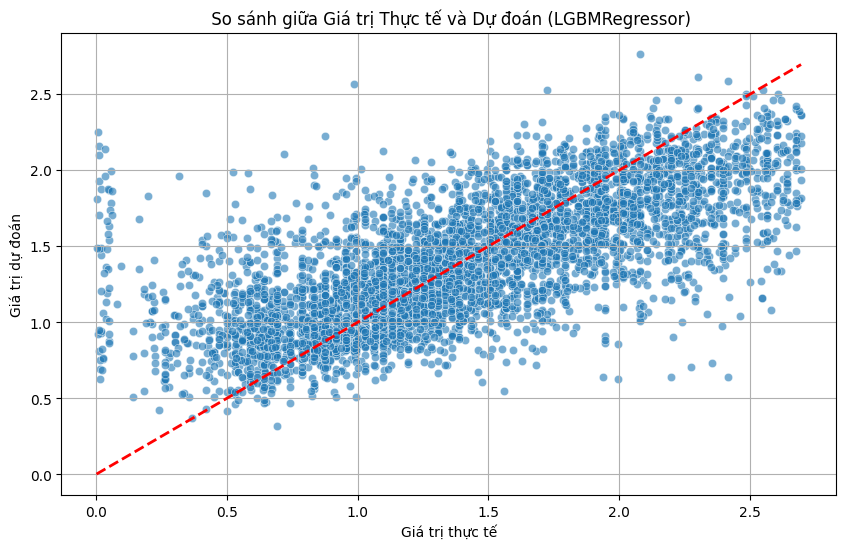

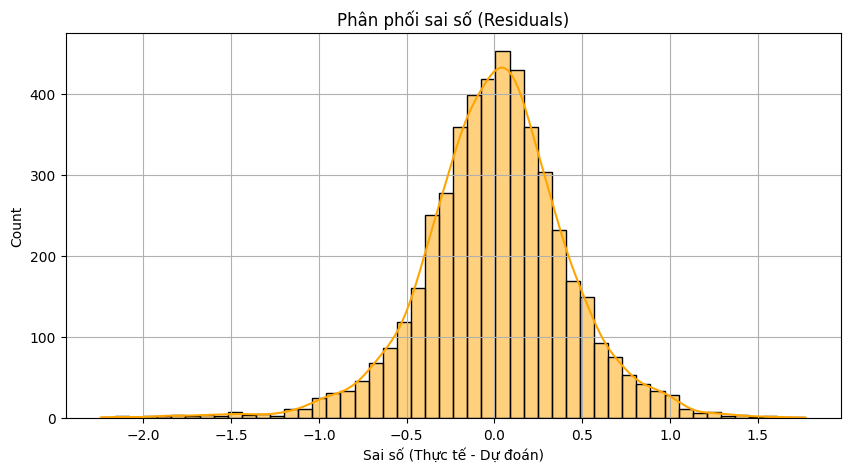

 Mô hình đã được lưu tại: best_lgb_model.pkl


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Thiết lập mô hình gốc
lgb = LGBMRegressor(random_state=42)

# 2. Tập siêu tham số để tìm kiếm
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'num_leaves': [31, 50, 70, 100],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0.1, 0.5, 1.0],
    'reg_lambda': [0.1, 0.5, 1.0]
}

# 3. RandomizedSearchCV để tìm siêu tham số tốt nhất
random_search = RandomizedSearchCV(
    estimator=lgb,
    param_distributions=param_grid,
    n_iter=50,
    scoring='r2',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# 4. Fit mô hình với tập huấn luyện
random_search.fit(X_train, y_train)

# 5. Dự đoán trên tập test với mô hình tốt nhất
best_lgb = random_search.best_estimator_
y_pred = best_lgb.predict(X_test)

# 6. Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Đánh giá mô hình LGBMRegressor (tối ưu):")
print(f" - MAE  : {mae:.4f}")
print(f" - RMSE : {rmse:.4f}")
print(f" - R²   : {r2:.4f}")
print("Tham số tốt nhất:", random_search.best_params_)

# 7. Biểu đồ so sánh y_test và y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title(' So sánh giữa Giá trị Thực tế và Dự đoán (LGBMRegressor)')
plt.grid(True)
plt.show()

# 8.  Biểu đồ phân phối sai số
errors = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(errors, bins=50, kde=True, color='orange')
plt.title('Phân phối sai số (Residuals)')
plt.xlabel('Sai số (Thực tế - Dự đoán)')
plt.grid(True)
plt.show()

# 9. Lưu mô hình đã huấn luyện
model_filename = "best_lgb_model.pkl"
joblib.dump(best_lgb, model_filename)
print(f" Mô hình đã được lưu tại: {model_filename}")


## Mô tả quy trình thực hiện mô hình XGBoost:
Quy trình bắt đầu với việc khởi tạo mô hình XGBoost (XGBRegressor) và định nghĩa tập siêu tham số cần tối ưu. RandomizedSearchCV được sử dụng để tìm tổ hợp siêu tham số tốt nhất bằng cách đánh giá chéo (cross-validation). Sau khi huấn luyện xong trên tập huấn luyện, mô hình tốt nhất sẽ được sử dụng để dự đoán trên tập kiểm tra. Các chỉ số như MAE, RMSE và R² được tính để đánh giá độ chính xác. Hai biểu đồ trực quan thể hiện độ phù hợp giữa dự đoán và thực tế, cũng như phân phối sai số. Cuối cùng, mô hình tối ưu được lưu lại bằng joblib để tái sử dụng mà không cần huấn luyện lại.

Fitting 3 folds for each of 50 candidates, totalling 150 fits
 Đánh giá mô hình XGBRegressor (tối ưu):
 - MAE  : 0.3079
 - RMSE : 0.4159
 - R²   : 0.5071
Tham số tốt nhất: {'subsample': 0.6, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.8}


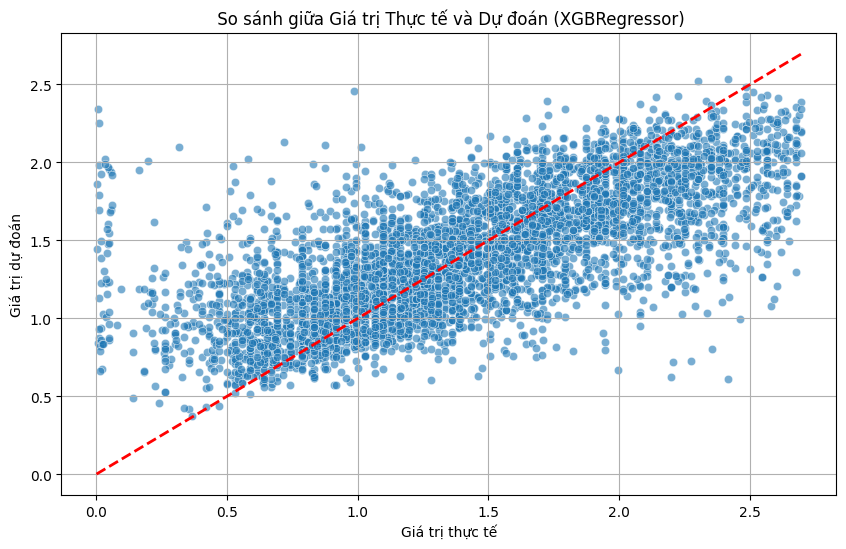

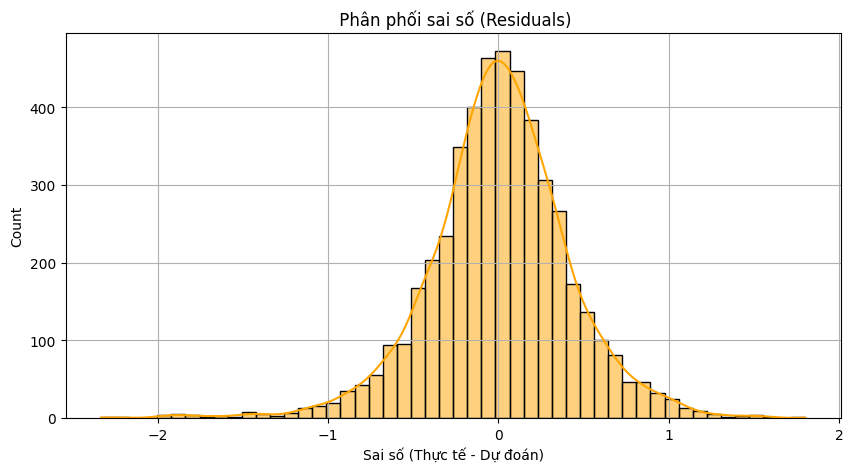

 Mô hình đã được lưu tại: best_xgb_model.pkl


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# 1. Thiết lập mô hình gốc
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# 2. Tập siêu tham số để tìm kiếm
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
}

# 3. RandomizedSearchCV để tìm siêu tham số tốt nhất
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,
    scoring='r2',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# 4. Fit mô hình với tập huấn luyện
random_search.fit(X_train, y_train)

# 5. Dự đoán trên tập test với mô hình tốt nhất
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# 6. Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(" Đánh giá mô hình XGBRegressor (tối ưu):")
print(f" - MAE  : {mae:.4f}")
print(f" - RMSE : {rmse:.4f}")
print(f" - R²   : {r2:.4f}")
print("Tham số tốt nhất:", random_search.best_params_)

# 7.  Biểu đồ so sánh y_test và y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title(' So sánh giữa Giá trị Thực tế và Dự đoán (XGBRegressor)')
plt.grid(True)
plt.show()

# 8.  Biểu đồ phân phối sai số
errors = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(errors, bins=50, kde=True, color='orange')
plt.title(' Phân phối sai số (Residuals)')
plt.xlabel('Sai số (Thực tế - Dự đoán)')
plt.grid(True)
plt.show()

# 9.  Lưu mô hình tốt nhất ra file
joblib.dump(best_xgb, 'best_xgb_model.pkl')
print(" Mô hình đã được lưu tại: best_xgb_model.pkl")


## Mô tả quy trình thực hiện mô hình HistGradientBoostingRegressor:
Quy trình bắt đầu bằng việc khởi tạo mô hình HistGradientBoostingRegressor và xây dựng một tập siêu tham số để thử nghiệm. Với RandomizedSearchCV, quá trình tìm kiếm siêu tham số tốt nhất được thực hiện bằng kỹ thuật đánh giá chéo (cross-validation) với tiêu chí R². Sau khi hoàn tất huấn luyện, mô hình tốt nhất được dùng để dự đoán trên tập kiểm tra. Các chỉ số đánh giá như MAE, RMSE và R² giúp kiểm tra hiệu suất mô hình. Hai biểu đồ trực quan hóa mối quan hệ giữa giá trị thực tế và giá trị dự đoán, cũng như phân phối sai số. Cuối cùng, mô hình tối ưu được lưu lại bằng joblib để sử dụng trong tương lai mà không cần huấn luyện lại.

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Đánh giá mô hình HistGradientBoostingRegressor (tối ưu):
 - MAE  : 0.3189
 - RMSE : 0.4250
 - R²   : 0.4852
Tham số tốt nhất: {'min_samples_leaf': 20, 'max_iter': 300, 'max_depth': 7, 'max_bins': 255, 'learning_rate': 0.05, 'l2_regularization': 0.0, 'early_stopping': False}


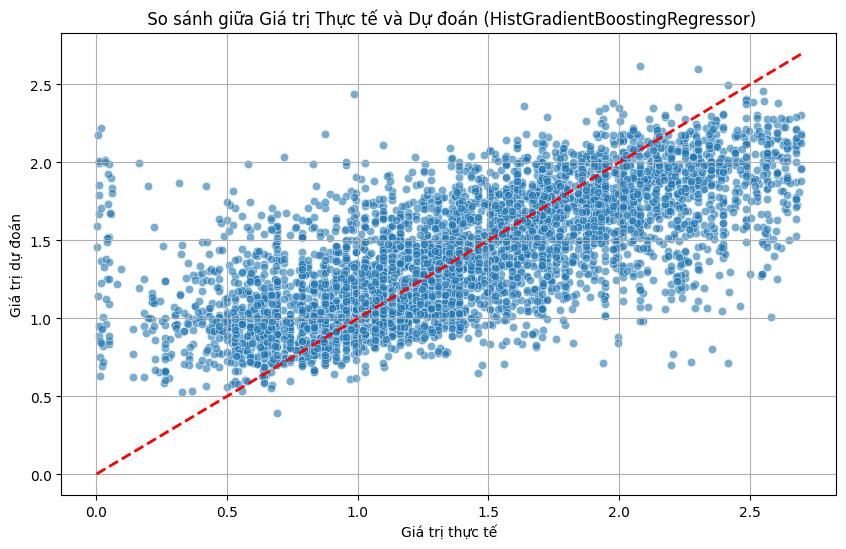

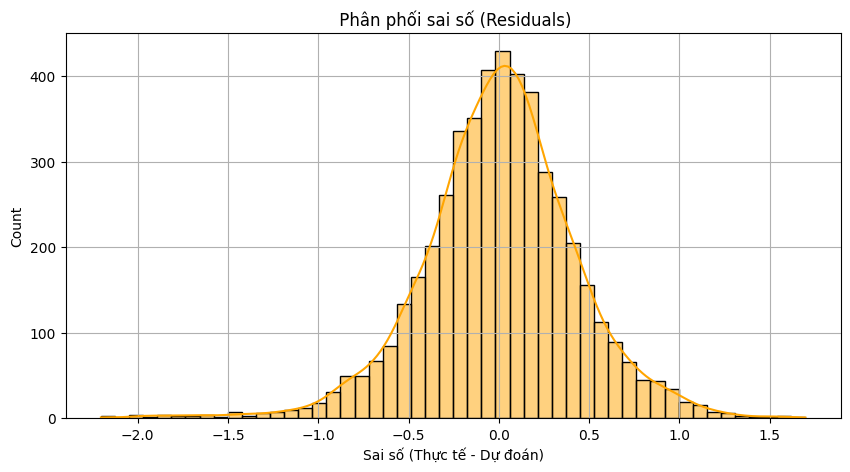

 Mô hình đã được lưu tại: best_hgb_model.pkl


In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# 1. Thiết lập mô hình gốc
hgb = HistGradientBoostingRegressor(random_state=42)

# 2. Tập siêu tham số để tìm kiếm
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_iter': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [20, 50, 100],
    'l2_regularization': [0.0, 0.1, 0.5, 1.0],
    'max_bins': [255, 512, 1024],
    'early_stopping': [True, False]
}

# 3. RandomizedSearchCV để tìm siêu tham số tốt nhất
random_search = RandomizedSearchCV(
    estimator=hgb,
    param_distributions=param_grid,
    n_iter=50,
    scoring='r2',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# 4. Fit mô hình với tập huấn luyện
random_search.fit(X_train, y_train)

# 5. Dự đoán trên tập test với mô hình tốt nhất
best_hgb = random_search.best_estimator_
y_pred = best_hgb.predict(X_test)

# 6. Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Đánh giá mô hình HistGradientBoostingRegressor (tối ưu):")
print(f" - MAE  : {mae:.4f}")
print(f" - RMSE : {rmse:.4f}")
print(f" - R²   : {r2:.4f}")
print("Tham số tốt nhất:", random_search.best_params_)

# 7.  Biểu đồ so sánh y_test và y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title(' So sánh giữa Giá trị Thực tế và Dự đoán (HistGradientBoostingRegressor)')
plt.grid(True)
plt.show()

# 8.  Biểu đồ phân phối sai số
errors = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(errors, bins=50, kde=True, color='orange')
plt.title(' Phân phối sai số (Residuals)')
plt.xlabel('Sai số (Thực tế - Dự đoán)')
plt.grid(True)
plt.show()

# 9.  Lưu mô hình tốt nhất ra file
joblib.dump(best_hgb, 'best_hgb_model.pkl')
print(" Mô hình đã được lưu tại: best_hgb_model.pkl")


# ***Nội dung 2***
Sử dụng các phương pháp học sâu (Deep Learning)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers, callbacks
import os
import json
import joblib

## Đọc và xử lý dữ liệu
Trong bước đầu tiên, dữ liệu được chọn lọc với một tập hợp các đặc trưng có ý nghĩa trong việc dự đoán giá nhà, như diện tích, số phòng ngủ, pháp lý, loại địa ốc, thành phố,… Cột mục tiêu là "Giá nhà (tỷ)".
Sau đó, toàn bộ dữ liệu được xáo trộn (shuffle) để tránh hiện tượng phân bố theo thứ tự ban đầu có thể ảnh hưởng đến quá trình huấn luyện (Shuffle toàn bộ dữ liệu (100%) để tránh hiện tượng lệch dữ liệu do thứ tự ban đầu)

Tiếp theo, các đặc trưng dạng phân loại (categorical) như "Pháp lý", "Loại địa ốc",… được mã hóa bằng LabelEncoder, chuyển đổi thành dạng số để mô hình có thể hiểu được.

In [ ]:
# 1. Đọc và xử lý dữ liệu
features = ['Diện tích', 'Phòng ngủ', 'Số tầng', 'Số toilet', 'Số phòng khách',
            'Đường trước nhà', 'Pháp lý', 'Hướng nhà', 'Loại địa ốc', 'Thành phố']
target = 'Giá nhà (tỷ)'

df_model = df_copy_cleaned[features + [target]].copy()
print(f"Kích thước dữ liệu ban đầu: {df_model.shape}")

# Lấy mẫu 100% dữ liệu
df_model = df_model.sample(frac=1, random_state=42)
print(f"Kích thước sau lấy mẫu: {df_model.shape}")

# Label Encoding
label_encoders = {}
for col in ['Pháp lý', 'Hướng nhà', 'Loại địa ốc', 'Thành phố']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le

Kích thước dữ liệu ban đầu: (52905, 11)
Kích thước sau lấy mẫu: (52905, 11)


## Loại bỏ ngoại lai (Outliers)
Để đảm bảo chất lượng dữ liệu đầu vào, các ngoại lai (outliers) trong cột giá nhà được loại bỏ bằng phương pháp IQR (Interquartile Range). Những điểm dữ liệu quá chênh lệch sẽ bị loại khỏi tập huấn luyện nhằm tránh gây nhiễu cho mô hình học sâu.

In [ ]:
# Xoá ngoại lai bằng IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

df_model = remove_outliers(df_model, target)
print(f"Sau khi loại outliers: {df_model.shape}")

Sau khi loại outliers: (48053, 11)


## Kiểm tra tương quan và loại bỏ đặc trưng dư thừa
Sau khi xử lý ngoại lai, hệ số tương quan giữa các đặc trưng được tính bằng ma trận Pearson. Những cặp đặc trưng có tương quan quá cao (trên 0.9) có thể gây dư thừa thông tin và làm giảm hiệu quả học của mô hình, nên sẽ bị loại bỏ.
Danh sách đặc trưng sau lọc sẽ là đầu vào chính thức cho bước huấn luyện. Tính ma trận tương quan và loại bỏ các cột có tương quan quá cao để giảm đa cộng tuyến.

In [ ]:
# Tương quan và loại bỏ đặc trưng tương quan cao
corr_matrix = df_model[features].corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
features = [f for f in features if f not in to_drop]
print(f"Đặc trưng sau loại tương quan cao: {features}")

Đặc trưng sau loại tương quan cao: ['Diện tích', 'Phòng ngủ', 'Số tầng', 'Số toilet', 'Số phòng khách', 'Đường trước nhà', 'Pháp lý', 'Hướng nhà', 'Loại địa ốc', 'Thành phố']


## Chuẩn hóa và chia dữ liệu
Dữ liệu sau khi chọn lọc đặc trưng được chuẩn hóa bằng StandardScaler để đưa tất cả về cùng thang đo (zero mean, unit variance).
Cột mục tiêu "Giá nhà" cũng được log-transform bằng np.log1p để giảm độ lệch và giúp mô hình học tốt hơn.

Sau đó, tập dữ liệu được chia thành hai phần: 80% để huấn luyện và 20% để kiểm tra.

Đối với các mô hình học sâu tuần tự như CNN và RNN, dữ liệu đầu vào được reshape về dạng 3 chiều (mẫu, bước thời gian, đặc trưng) để tương thích với kiến trúc mạng.

In [ ]:
# Chuẩn hoá và chia tập
scaler = StandardScaler()
X = scaler.fit_transform(df_model[features])
y = np.log1p(df_model[target])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape cho CNN/RNN
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

## Callbacks: EarlyStopping & ReduceLROnPlateau
Giúp mô hình dừng sớm khi không cải thiện và giảm learning rate để tối ưu tốt hơn.
* EarlyStopping: dừng sớm nếu validation loss không giảm trong một số epoch.

* ReduceLROnPlateau: giảm learning rate khi mô hình gặp khó khăn trong học.

In [ ]:
# Callbacks
early_stop = callbacks.EarlyStopping(patience=20, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(patience=5, factor=0.5, verbose=1)

## Xây dựng mô hình MLP, ANN, CNN, RNN
Bốn mô hình học sâu khác nhau được xây dựng để so sánh hiệu quả dự đoán:

*   MLP (Multi-layer Perceptron): mạng nơ-ron nhiều lớp đơn giản.
*   ANN (Artificial Neural Network): cấu trúc sâu hơn MLP, có thêm lớp ẩn trung gian.
*   CNN (Convolutional Neural Network): sử dụng lớp tích chập (Conv1D) để trích xuất đặc trưng theo chiều dữ liệu.
*   RNN (Recurrent Neural Network): mô hình tuần tự dùng cho dữ liệu dạng chuỗi.

Mỗi mô hình đều có các lớp Dense, Batch Normalization, Dropout để tăng tính ổn định và chống overfitting.

In [ ]:
# Các mô hình
def build_mlp():
    return keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(1)
    ])

def build_ann():
    return keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

def build_cnn():
    return keras.Sequential([
        layers.Input(shape=(X_train.shape[1], 1)),
        layers.Conv1D(64, kernel_size=2, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1)
    ])

def build_rnn():
    return keras.Sequential([
        layers.Input(shape=(X_train.shape[1], 1)),
        layers.SimpleRNN(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1)
    ])

# Thiết lập mức độ logging cho TensorFlow
tf.get_logger().setLevel('ERROR')

## Hàm đánh giá mô hình
Sau khi huấn luyện, mô hình được đánh giá trên tập kiểm tra bằng 4 chỉ số. Tính các chỉ số đánh giá: MSE, RMSE, MAE, R² để so sánh giữa các mô hình.

* MSE – Sai số bình phương trung bình.

* RMSE – Căn bậc hai của MSE.

* MAE – Sai số tuyệt đối trung bình.

* R² – Hệ số xác định, phản ánh mức độ giải thích biến thiên của mô hình.

In [ ]:
# Hàm đánh giá
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return {"mse": mse, "rmse": rmse, "r2": r2, "mae": mae}

## Huấn luyện mô hình
Sau khi chuẩn bị dữ liệu và xây dựng các mô hình mạng MLP, ANN, CNN và RNN, bước tiếp theo là huấn luyện và đánh giá chúng để so sánh hiệu quả dự đoán giá nhà.

Trước hết, ta định nghĩa một hàm tiện ích có tên train_and_evaluate(). Hàm này thực hiện toàn bộ quy trình huấn luyện cho một mô hình bất kỳ: nó nhận tên mô hình, hàm xây dựng mô hình, dữ liệu huấn luyện và kiểm tra. Trong hàm này, trước tiên, ta gọi model_fn() để khởi tạo mô hình tương ứng. Sau đó, mô hình được compile với hàm mất mát là Mean Squared Error (MSE) – một lựa chọn phổ biến cho bài toán hồi quy, và sử dụng bộ tối ưu hóa Adam với learning rate được đặt nhỏ (0.0001) để giúp mô hình học ổn định và tránh overshooting.

Mô hình sau đó được huấn luyện (fit) với các thông số như: số epoch tối đa là 200, batch size là 32, và 10% dữ liệu huấn luyện được sử dụng làm tập xác thực (validation). Đặc biệt, để tránh overfitting và giúp quá trình học hiệu quả hơn, ta áp dụng hai cơ chế tự động:

* EarlyStopping: nếu sau 20 epoch validation loss không cải thiện, quá trình huấn luyện sẽ dừng sớm và khôi phục lại trọng số tốt nhất.

* ReduceLROnPlateau: nếu validation loss không giảm sau 5 epoch, learning rate sẽ giảm xuống một nửa, giúp mô hình vượt qua các vùng local minima.

Sau khi huấn luyện xong, mô hình sẽ thực hiện dự đoán (predict) trên tập kiểm tra, và ta dùng hàm evaluate() đã định nghĩa từ trước để tính các chỉ số đánh giá gồm: MSE, RMSE, MAE và R².

Tiếp theo, ta lần lượt huấn luyện từng mô hình như sau:

* Mô hình MLP được huấn luyện với dữ liệu X_train, y_train (và tương ứng với X_test, y_test để đánh giá).

* Tương tự, mô hình ANN được huấn luyện theo cùng cách.

* Với các mô hình CNN và RNN, vì yêu cầu định dạng dữ liệu đầu vào là chuỗi hoặc ảnh, ta reshape dữ liệu về dạng 3 chiều (số mẫu, số đặc trưng, 1) trước khi huấn luyện.

Kết quả huấn luyện của từng mô hình bao gồm tên mô hình, đối tượng mô hình và các chỉ số đánh giá – được lưu lại trong một danh sách results để sử dụng sau này cho việc tổng hợp, so sánh và chọn ra mô hình tốt nhất.

In [ ]:
# Huấn luyện và đánh giá
def train_and_evaluate(name, model_fn, Xtr, Xte, ytr, yte):
    model = model_fn()
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    model.fit(
        Xtr, ytr,
        epochs=200,
        batch_size=32,
        verbose=0,
        validation_split=0.1,
        callbacks=[early_stop, reduce_lr]
    )
    y_pred = model.predict(Xte).flatten()
    metrics = evaluate(yte, y_pred)
    return name, model, metrics

# Huấn luyện tất cả mô hình
results = []
results.append(train_and_evaluate("MLP", build_mlp, X_train, X_test, y_train, y_test))
results.append(train_and_evaluate("ANN", build_ann, X_train, X_test, y_train, y_test))
results.append(train_and_evaluate("CNN", build_cnn, X_train_rnn, X_test_rnn, y_train, y_test))
results.append(train_and_evaluate("RNN", build_rnn, X_train_rnn, X_test_rnn, y_train, y_test))


Epoch 128: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 133: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.

Epoch 150: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.

Epoch 155: ReduceLROnPlateau reducing learning rate to 6.24999984211172e-06.

Epoch 160: ReduceLROnPlateau reducing learning rate to 3.12499992105586e-06.

Epoch 166: ReduceLROnPlateau reducing learning rate to 1.56249996052793e-06.

Epoch 172: ReduceLROnPlateau reducing learning rate to 7.81249980263965e-07.

Epoch 177: ReduceLROnPlateau reducing learning rate to 3.906249901319825e-07.

Epoch 182: ReduceLROnPlateau reducing learning rate to 1.9531249506599124e-07.

Epoch 187: ReduceLROnPlateau reducing learning rate to 9.765624753299562e-08.

Epoch 192: ReduceLROnPlateau reducing learning rate to 4.882812376649781e-08.

Epoch 197: ReduceLROnPlateau reducing learning rate to 2.4414061883248905e-08.
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Epoch 121: R

## Tổng hợp và hiển thị kết quả
Sau khi hoàn tất huấn luyện, tất cả mô hình và chỉ số đánh giá được lưu lại. Một bảng kết quả được tạo ra để hiển thị và so sánh hiệu quả các mô hình.

Ngoài ra, top 2 mô hình tốt nhất theo từng tiêu chí (MSE, RMSE, MAE, R²) cũng được in ra để xác định mô hình tối ưu nhất cho bài toán.

In [ ]:
# Tổng hợp kết quả
df_result = pd.DataFrame([{
    "Model": name,
    **metrics
} for name, model, metrics in results])

print("\n=== Evaluation Results (Sorted by RMSE) ===")
print(df_result.sort_values(by="rmse"))

# Top 2 mô hình theo mỗi tiêu chí
print("\n=== Top 2 Models by MSE ===")
print(df_result.sort_values(by="mse").head(2))

print("\n=== Top 2 Models by RMSE ===")
print(df_result.sort_values(by="rmse").head(2))

print("\n=== Top 2 Models by MAE ===")
print(df_result.sort_values(by="mae").head(2))

print("\n=== Top 2 Models by R² ===")
print(df_result.sort_values(by="r2", ascending=False).head(2))


=== Evaluation Results (Sorted by RMSE) ===
  Model       mse      rmse        r2       mae
0   MLP  0.221292  0.470417  0.402141  0.360322
1   ANN  0.223778  0.473052  0.395424  0.363433
3   RNN  0.250759  0.500758  0.322531  0.389652
2   CNN  0.270452  0.520050  0.269327  0.408284

=== Top 2 Models by MSE ===
  Model       mse      rmse        r2       mae
0   MLP  0.221292  0.470417  0.402141  0.360322
1   ANN  0.223778  0.473052  0.395424  0.363433

=== Top 2 Models by RMSE ===
  Model       mse      rmse        r2       mae
0   MLP  0.221292  0.470417  0.402141  0.360322
1   ANN  0.223778  0.473052  0.395424  0.363433

=== Top 2 Models by MAE ===
  Model       mse      rmse        r2       mae
0   MLP  0.221292  0.470417  0.402141  0.360322
1   ANN  0.223778  0.473052  0.395424  0.363433

=== Top 2 Models by R² ===
  Model       mse      rmse        r2       mae
0   MLP  0.221292  0.470417  0.402141  0.360322
1   ANN  0.223778  0.473052  0.395424  0.363433


## Biểu đồ cột cho các chỉ số đánh giá

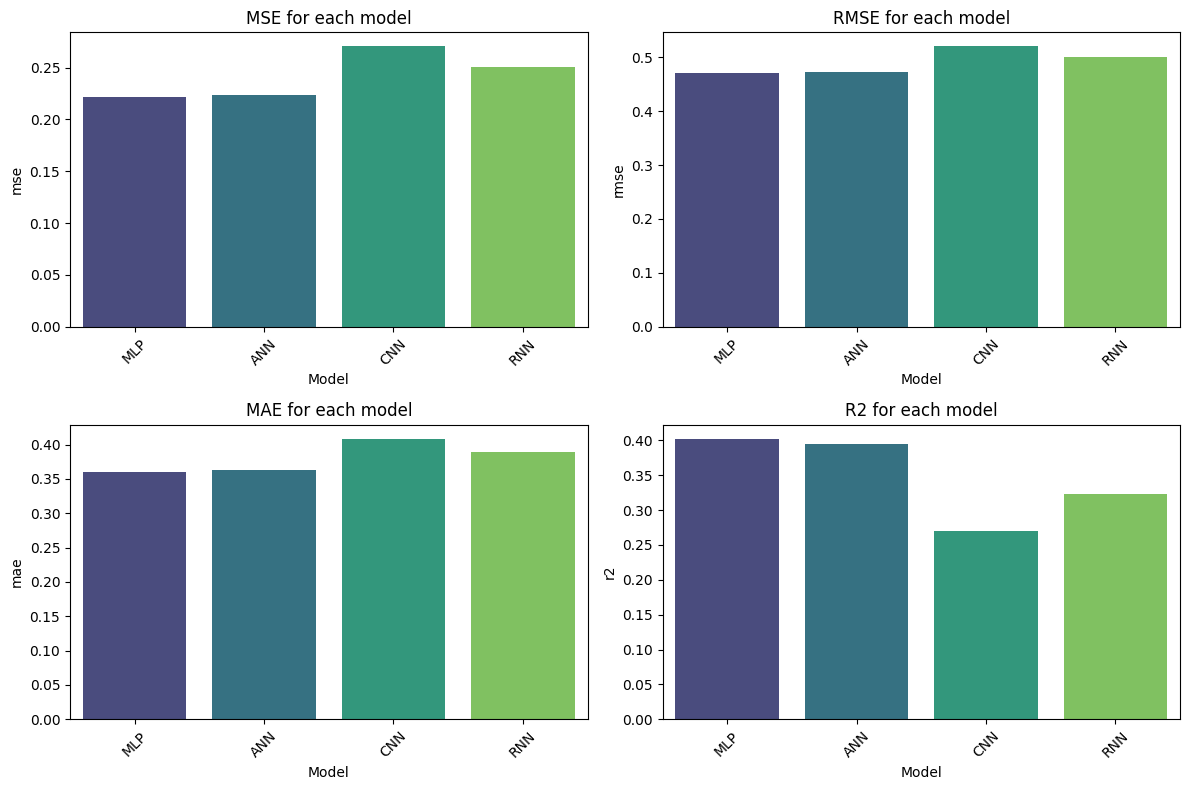

In [ ]:
# Vẽ biểu đồ cột cho MSE, RMSE, MAE, R²
def plot_metrics(df_result):
    metrics = ['mse', 'rmse', 'mae', 'r2']

    plt.figure(figsize=(12, 8))

    for i, metric in enumerate(metrics, 1):
        plt.subplot(2, 2, i)
        sns.barplot(x='Model', y=metric, data=df_result, hue='Model', palette='viridis', legend=False)
        plt.title(f'{metric.upper()} for each model')
        plt.xticks(rotation=45)
        plt.tight_layout()

    plt.show()

plot_metrics(df_result)

## Biều đồ đường so sánh các chỉ số

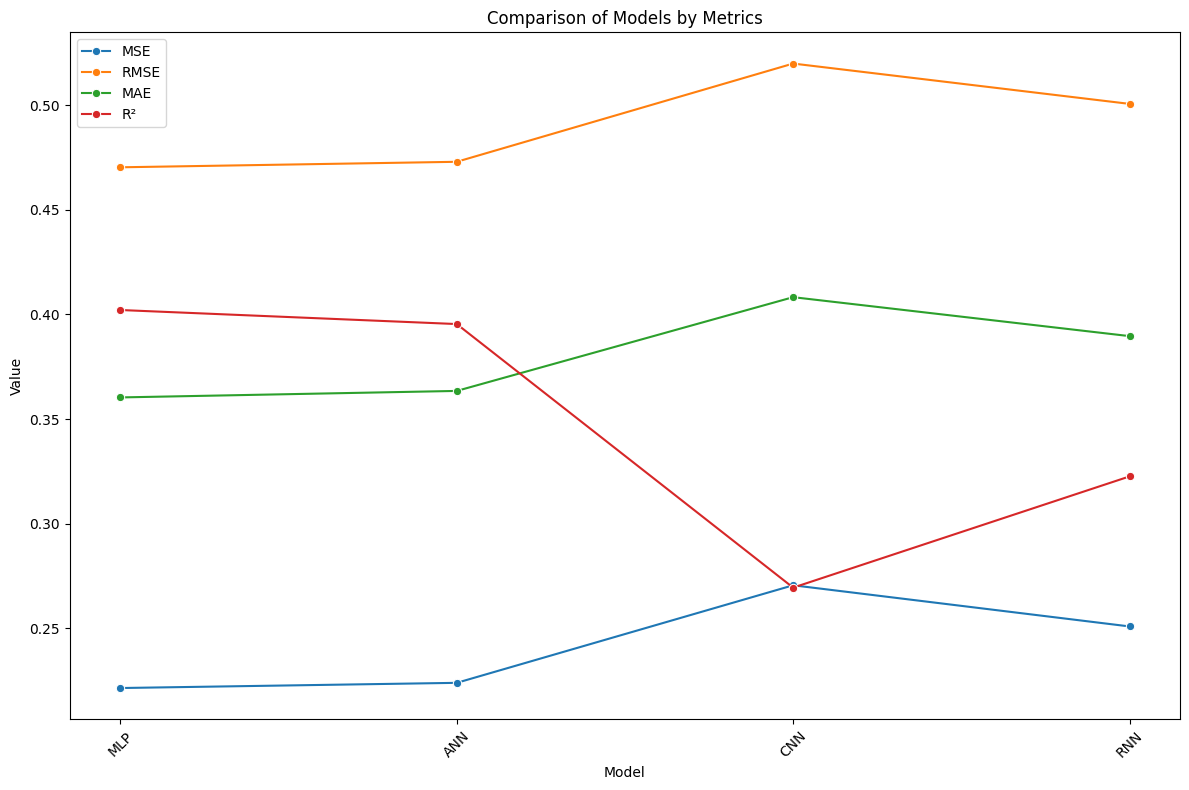

In [ ]:
# Vẽ biểu đồ so sánh tất cả các chỉ số
def plot_comparison(df_result):
    plt.figure(figsize=(12, 8))

    sns.lineplot(x='Model', y='mse', data=df_result, label='MSE', marker='o')
    sns.lineplot(x='Model', y='rmse', data=df_result, label='RMSE', marker='o')
    sns.lineplot(x='Model', y='mae', data=df_result, label='MAE', marker='o')
    sns.lineplot(x='Model', y='r2', data=df_result, label='R²', marker='o')

    plt.title('Comparison of Models by Metrics')
    plt.xlabel('Model')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_comparison(df_result)

## Lưu mô hình và metrics
Sau khi huấn luyện xong tất cả các mô hình (MLP, ANN, CNN, RNN), ta tiến hành lưu lại cả mô hình và các chỉ số đánh giá tương ứng để phục vụ cho việc sử dụng lại sau này mà không cần huấn luyện lại từ đầu.
Việc lưu trữ có cấu trúc giúp dễ dàng truy xuất, so sánh hoặc sử dụng lại các mô hình trong các bước triển khai tiếp theo (deploy, phân tích hiệu suất, so sánh mô hình,...).

In [ ]:
# Tạo thư mục lưu
model_dir = "saved_models_deeplearning"
os.makedirs(model_dir, exist_ok=True)

# Lưu mô hình và metrics
model_info = {}

for name, model, metrics in results:
    # Lưu mô hình
    model_path = os.path.join(model_dir, f"{name}.keras")
    model.save(model_path)

    # Lưu metrics ra JSON
    metrics_path = os.path.join(model_dir, f"{name}_metrics_deeplearning.json")
    with open(metrics_path, "w") as f:
        json.dump(metrics, f, indent=4)

    # Lưu tổng hợp
    model_info[name] = {
        "model_path": model_path,
        "metrics_path": metrics_path,
        "metrics": metrics
    }

# Lưu toàn bộ info bằng joblib
joblib.dump(model_info, os.path.join(model_dir, "all_models_info_deeplearning.pkl"))

print(f"Đã lưu {len(model_info)} mô hình và metrics tại '{model_dir}'")

Đã lưu 4 mô hình và metrics tại 'saved_models_deeplearning'
